In [793]:
import RL
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Creating grid world environment

In [794]:
grid_rows = 5
grid_cols = 8
num_actions = 8
living_rewards = .1
terminal_states = [0, 8, 16, 18, 21, 24, 26]
terminal_rewards = {0:-1, 8:1, 16:-1, 18:-1, 21:-1, 24:-1, 26:-1}

env = RL.GridWorldEnv(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.01, 
                      living_rewards=living_rewards, initial_state=33)

n = env.n
m = env.m
states = env.states
actions = env.actions

# Creating model free instance to run algorithms

In [795]:
# Created instance of class to run model free based algorithms.
model_free_rl = RL.ModelFreeRL(n=n, m=m, states=states, actions=actions, alpha=.6, alpha_decay=True,
                               alpha_decay_param=.01, gamma=.95, num_episodes=5000, 
                               epsilon=.1, horizon=100, epsilon_decay=True, 
                               epsilon_decay_param=.0001)

# Q-Learning

In [ ]:
model_free_rl.q_learning(env)

display = RL.GridDisplay(model_free_rl, env)
display.show_values(title='Grid World: Q-Learning Values')
display.show_q_values(title='Grid World: Q-Learning Q-Values')

In [ ]:
q_error = model_free_rl.test_optimal_q(env)
v_error = model_free_rl.test_optimal_v(env)
print v_error.max()
print q_error.max()

# Plotting episode returns and parameters across episodes

In [ ]:
# Plotting the returns at each episode.
model_free_rl.scatter_epsiode_returns()

# Plotting the epsilon parameters at each episode.
model_free_rl.plot_epsilon_parameters()

# Plotting the step size parameter for a state.
model_free_rl.plot_alpha_parameters(s=33, a=0)

# Creating model based instance to run algorithms

In [819]:
# Created instance of class to run model based algorithms.
model_rl = RL.ModelBasedRL(max_eval=1000, gamma=.95)
mdp = RL.GridWorldMDP(grid_rows, grid_cols, num_actions, terminal_states, 
                      terminal_rewards, prob_noise=.01, 
                      living_rewards=living_rewards)
start_state = 33

# Q-Value Iteration

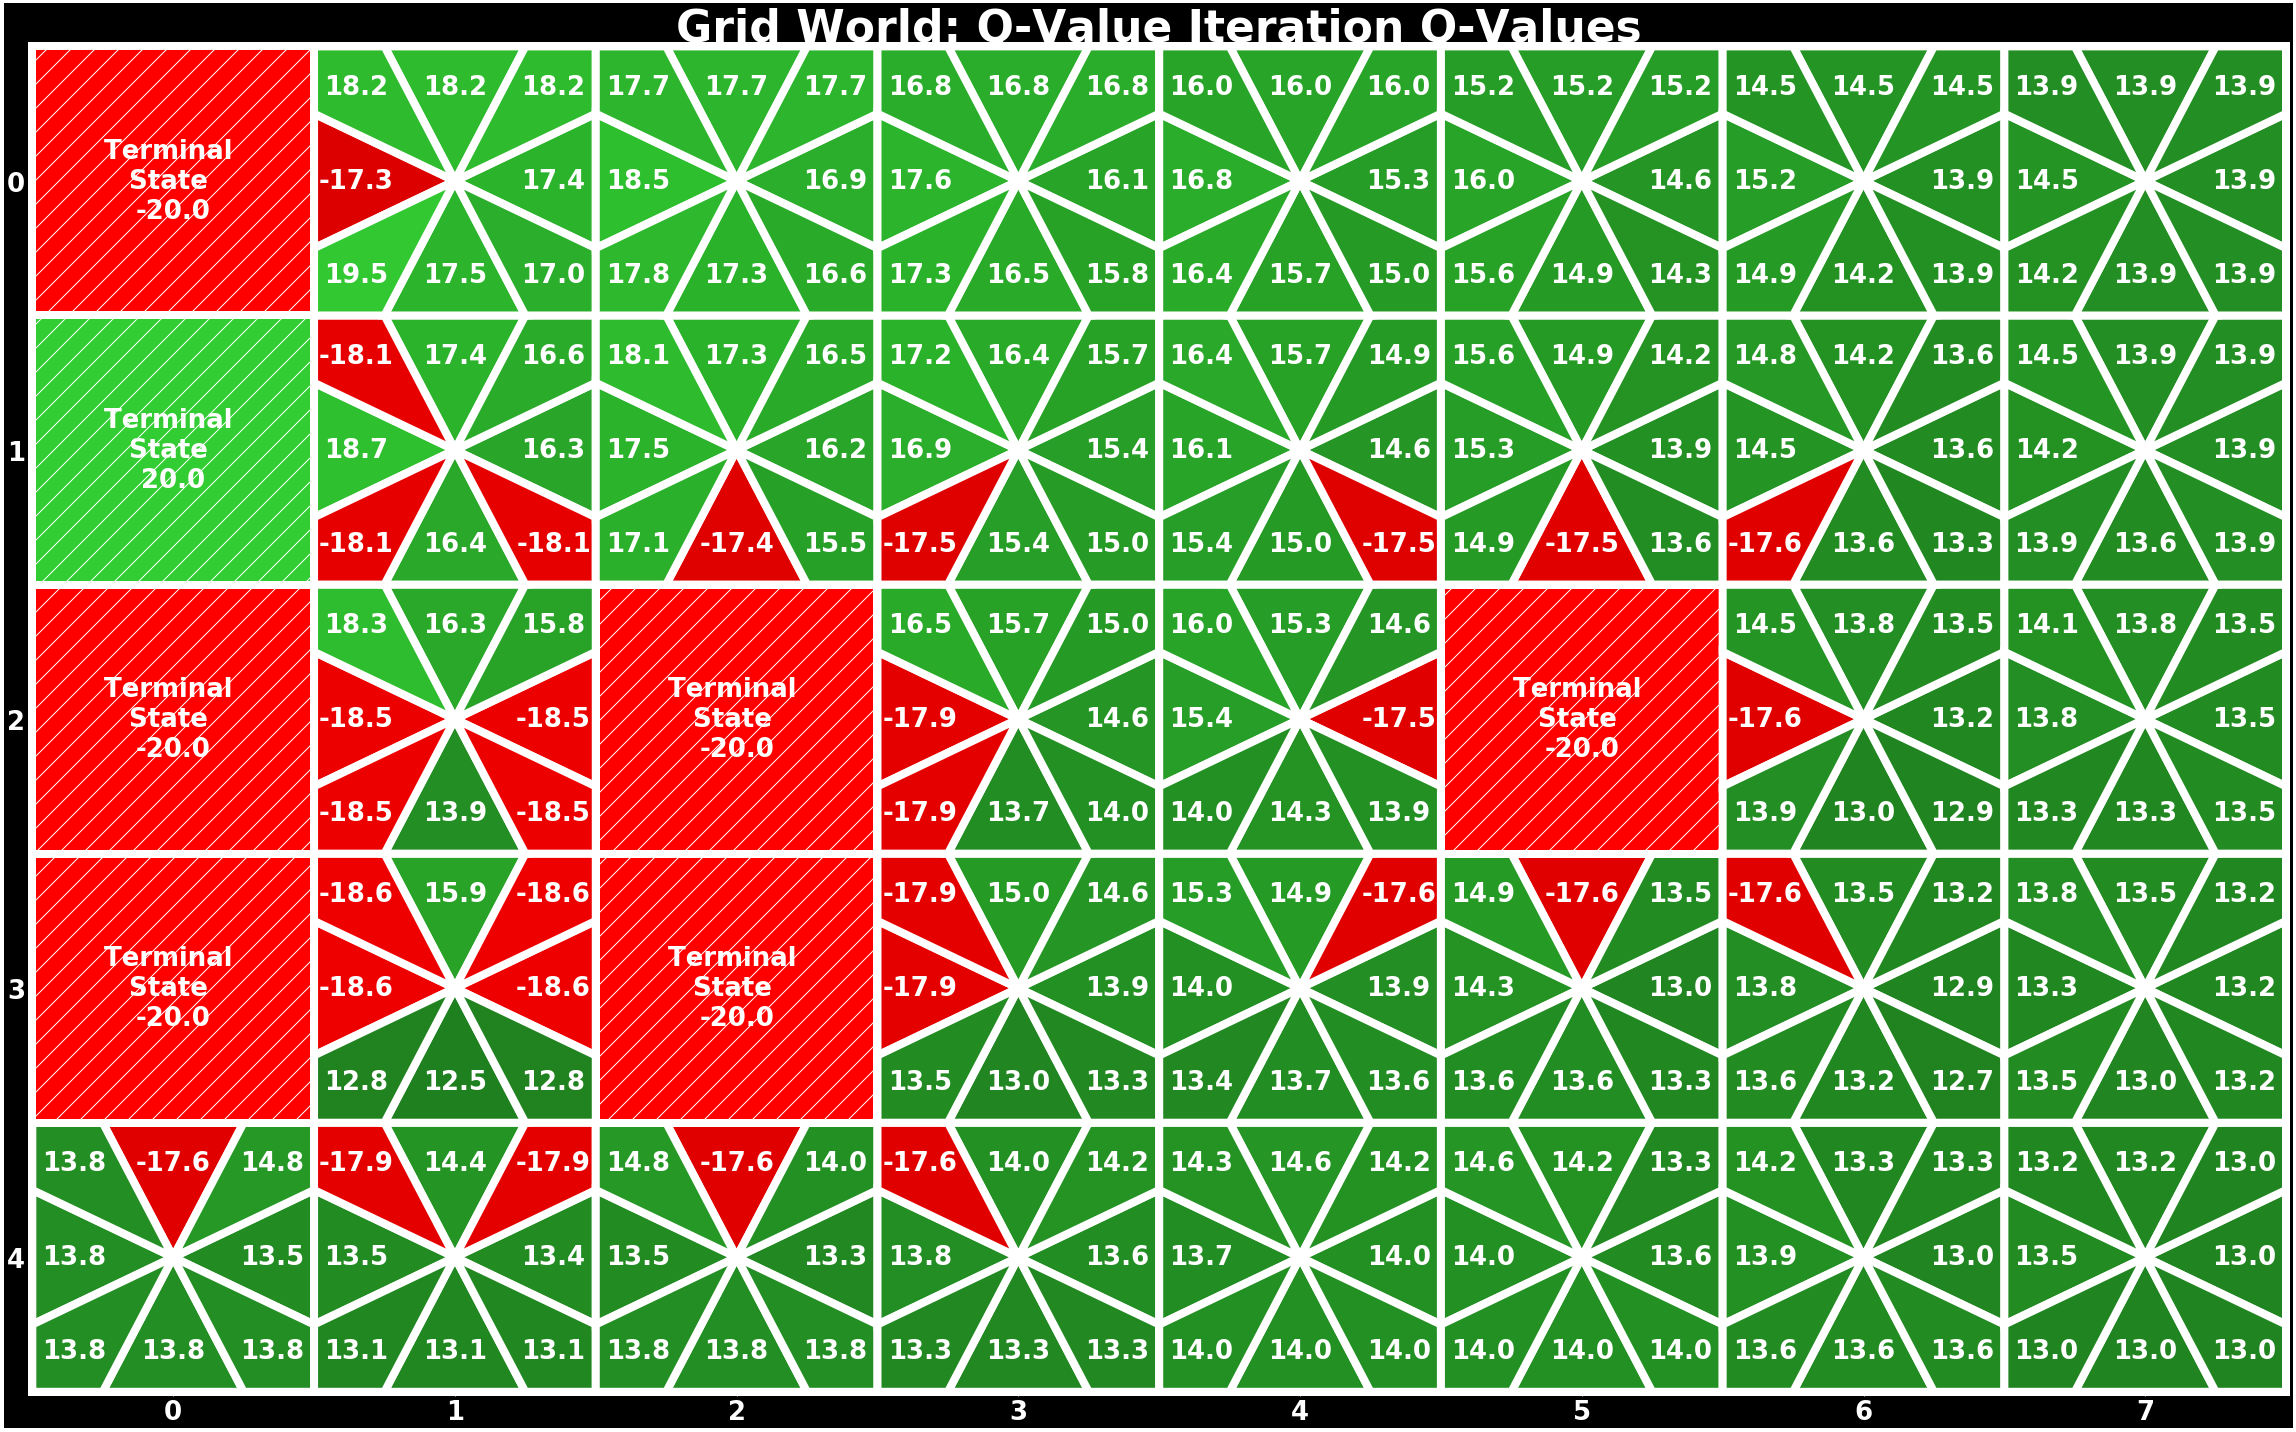

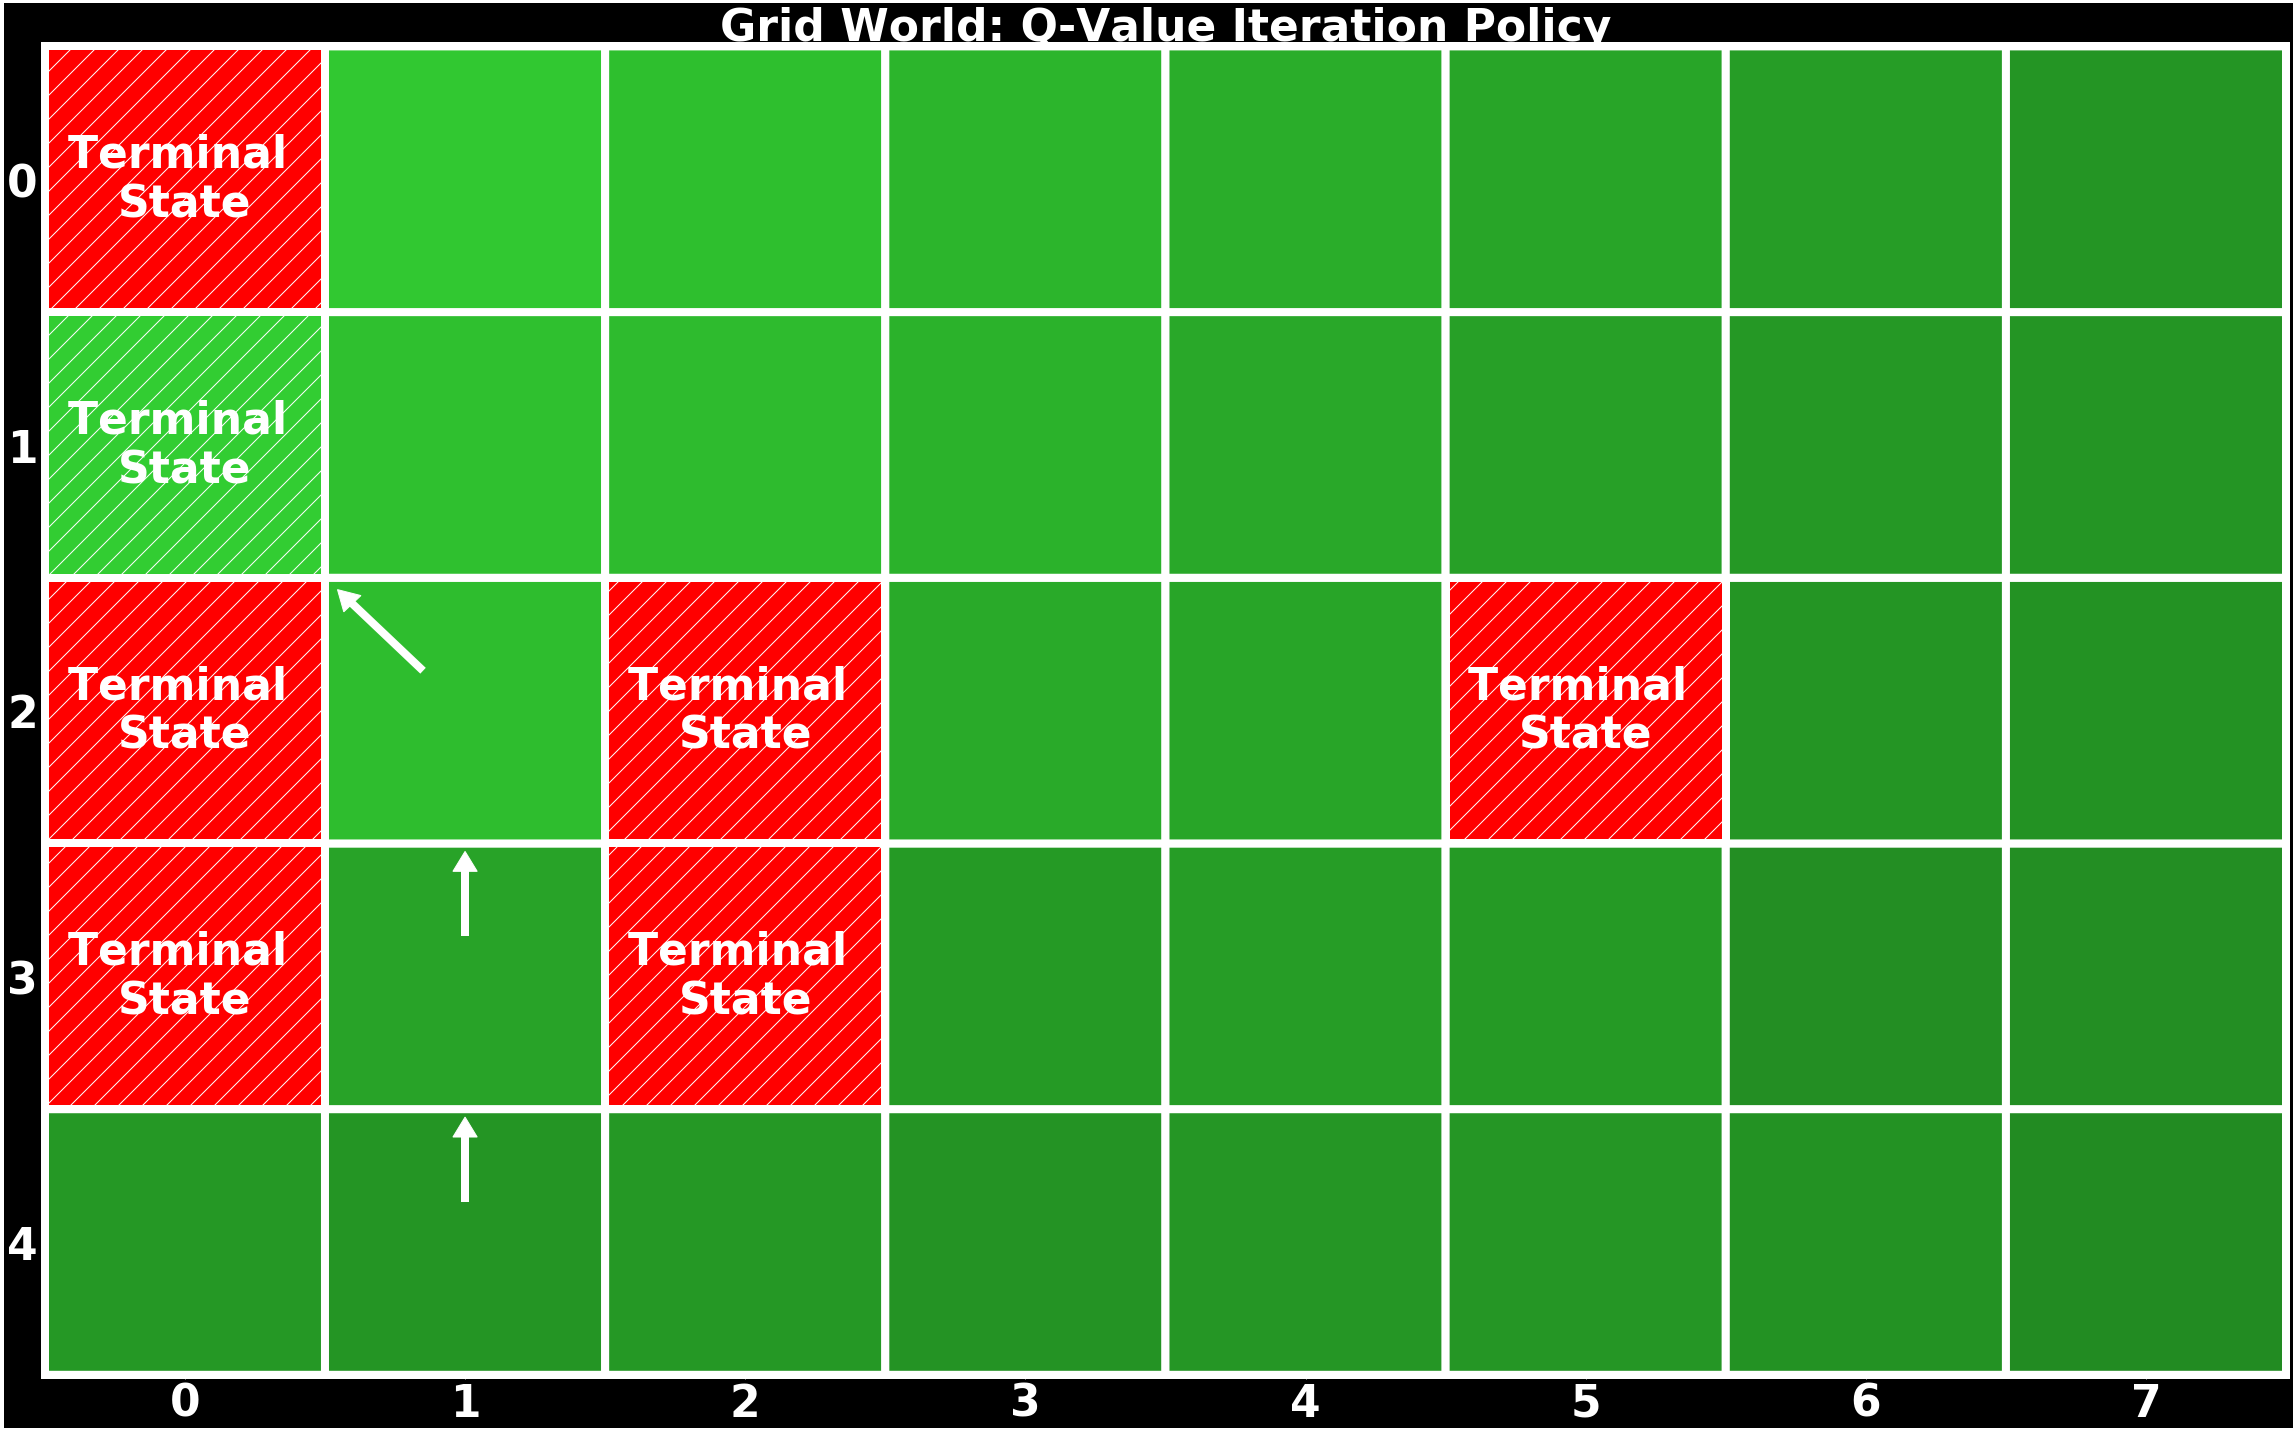

In [882]:
model_rl.q_value_iteration(mdp)

display = RL.GridDisplay(model_rl, mdp)

display.show_q_values(title='Grid World: Q-Value Iteration Q-Values', save_fig=True)
display.show_values(title='Grid World: Q-Value Iteration Values', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, title='Grid World: Q-Value Iteration Policy', save_fig=True)

In [872]:
q_error = model_rl.test_optimal_q(mdp)
v_error = model_rl.test_optimal_v(mdp)
print v_error.max()
print q_error.max()

9.28907687978e-05
9.28907687978e-05


# Risk Sensitive Reinforcement Learning

In [883]:
max_eval = 10000
alpha = .01
tol = 1e-8

model_rl = RL.ModelBasedRL(max_eval=max_eval, gamma=.95)

# Agents

In [951]:
agent_neutral = RL.ProspectAgent(ref=0, c_minus=1, c_plus=1, rho_minus=.5, rho_plus=.5)
agent_low = RL.ProspectAgent(ref=0, c_minus=7.5, c_plus=1, rho_minus=.5, rho_plus=.5)
agent_mid = RL.ProspectAgent(ref=0, c_minus=17.5, c_plus=1, rho_minus=.5, rho_plus=.5)
agent_high = RL.ProspectAgent(ref=0, c_minus=20, c_plus=1, rho_minus=.5, rho_plus=.5)

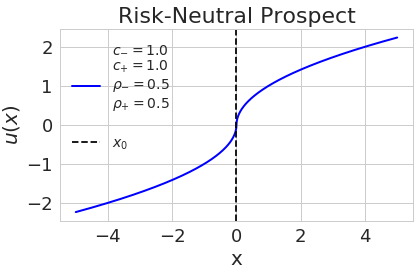

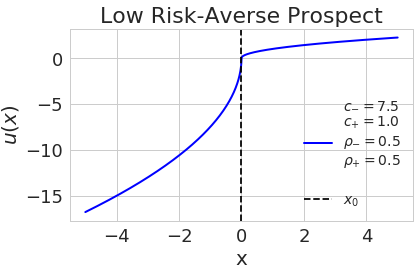

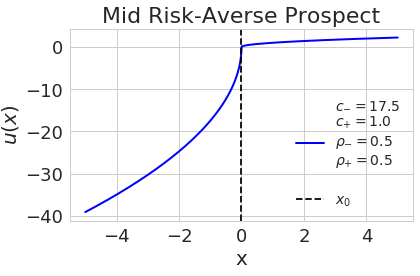

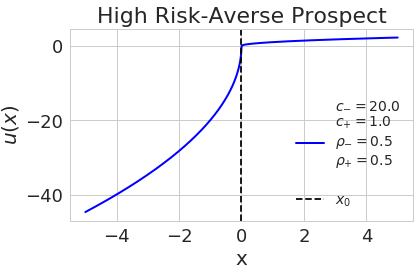

In [952]:
agent_neutral.plot_value_function(title='Risk-Neutral Prospect', save_fig=True, fig_name='prospect_neutral')

agent_low.plot_value_function(title='Low Risk-Averse Prospect', save_fig=True, fig_name='prospect_low')

agent_mid.plot_value_function(title='Mid Risk-Averse Prospect', save_fig=True, fig_name='prospect_mid')

agent_high.plot_value_function(title='High Risk-Averse Prospect', save_fig=True, fig_name='prospect_high')

# Risk Neutral Agent

0 not converged 320 0.0
1000 not converged 320 0.00754216327074
2000 not converged 320 0.00526324444052
3000 not converged 320 0.00301002163184
4000 not converged 320 0.000502747407428
5000 not converged 80 4.44699436635e-05
6000 not converged 75 4.44699436635e-05
7000 not converged 75 4.57470064852e-05
8000 not converged 75 4.44699436635e-05
9000 not converged 75 9.24705923673e-05


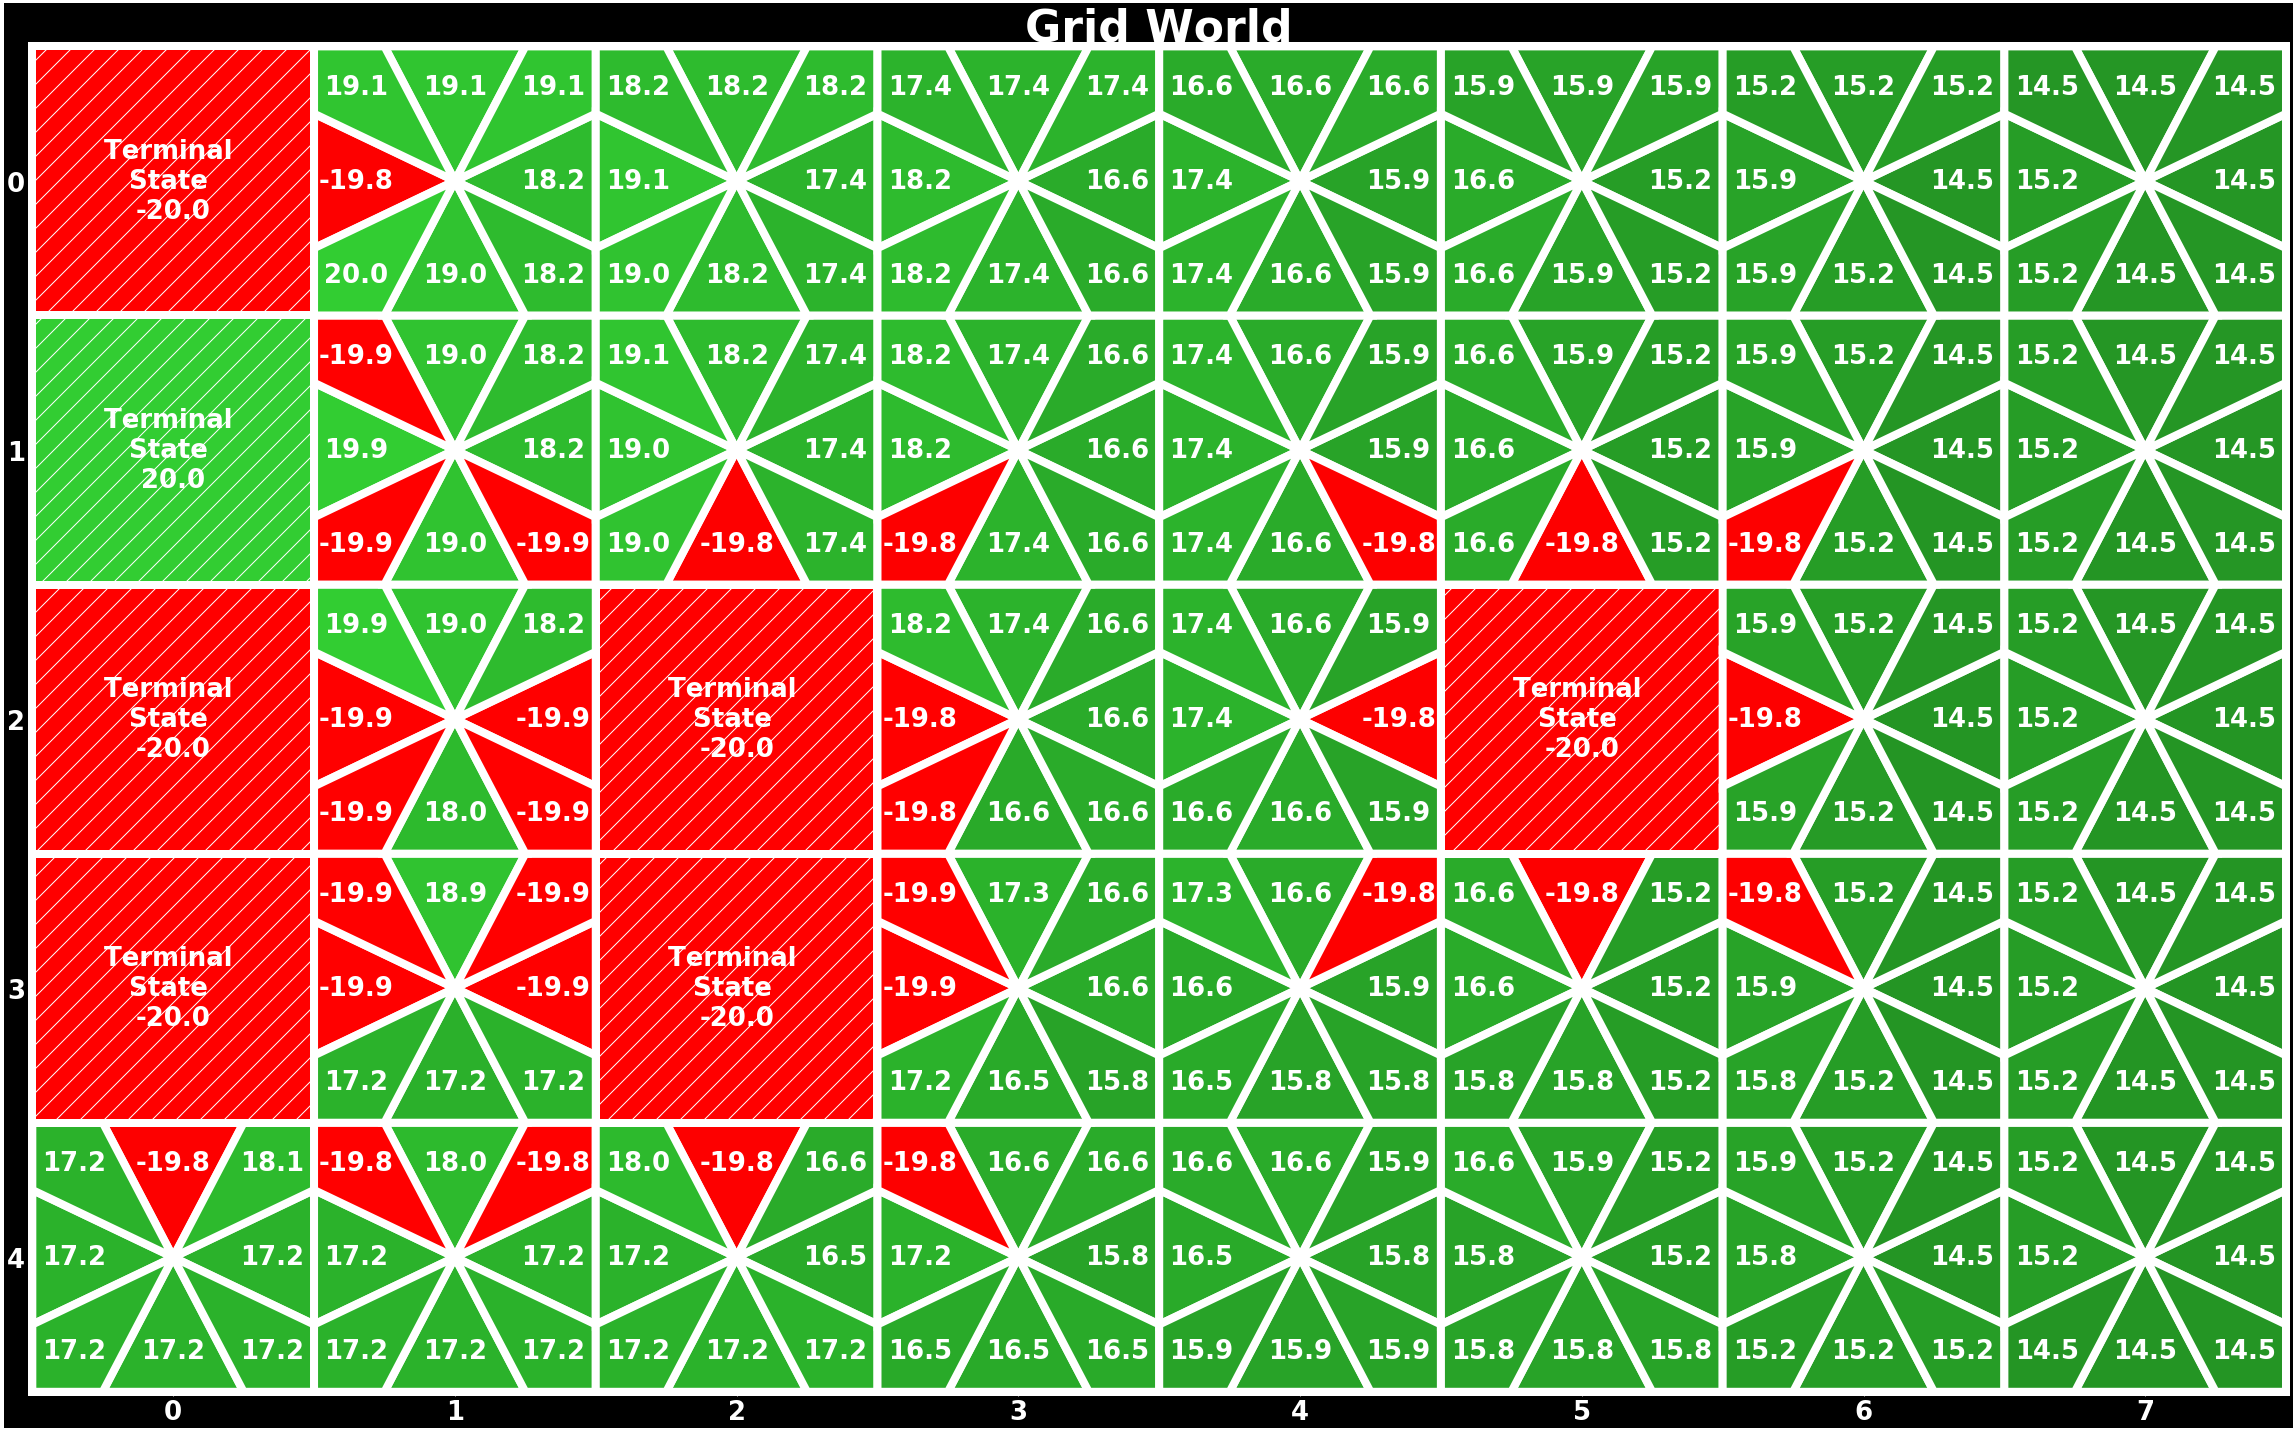

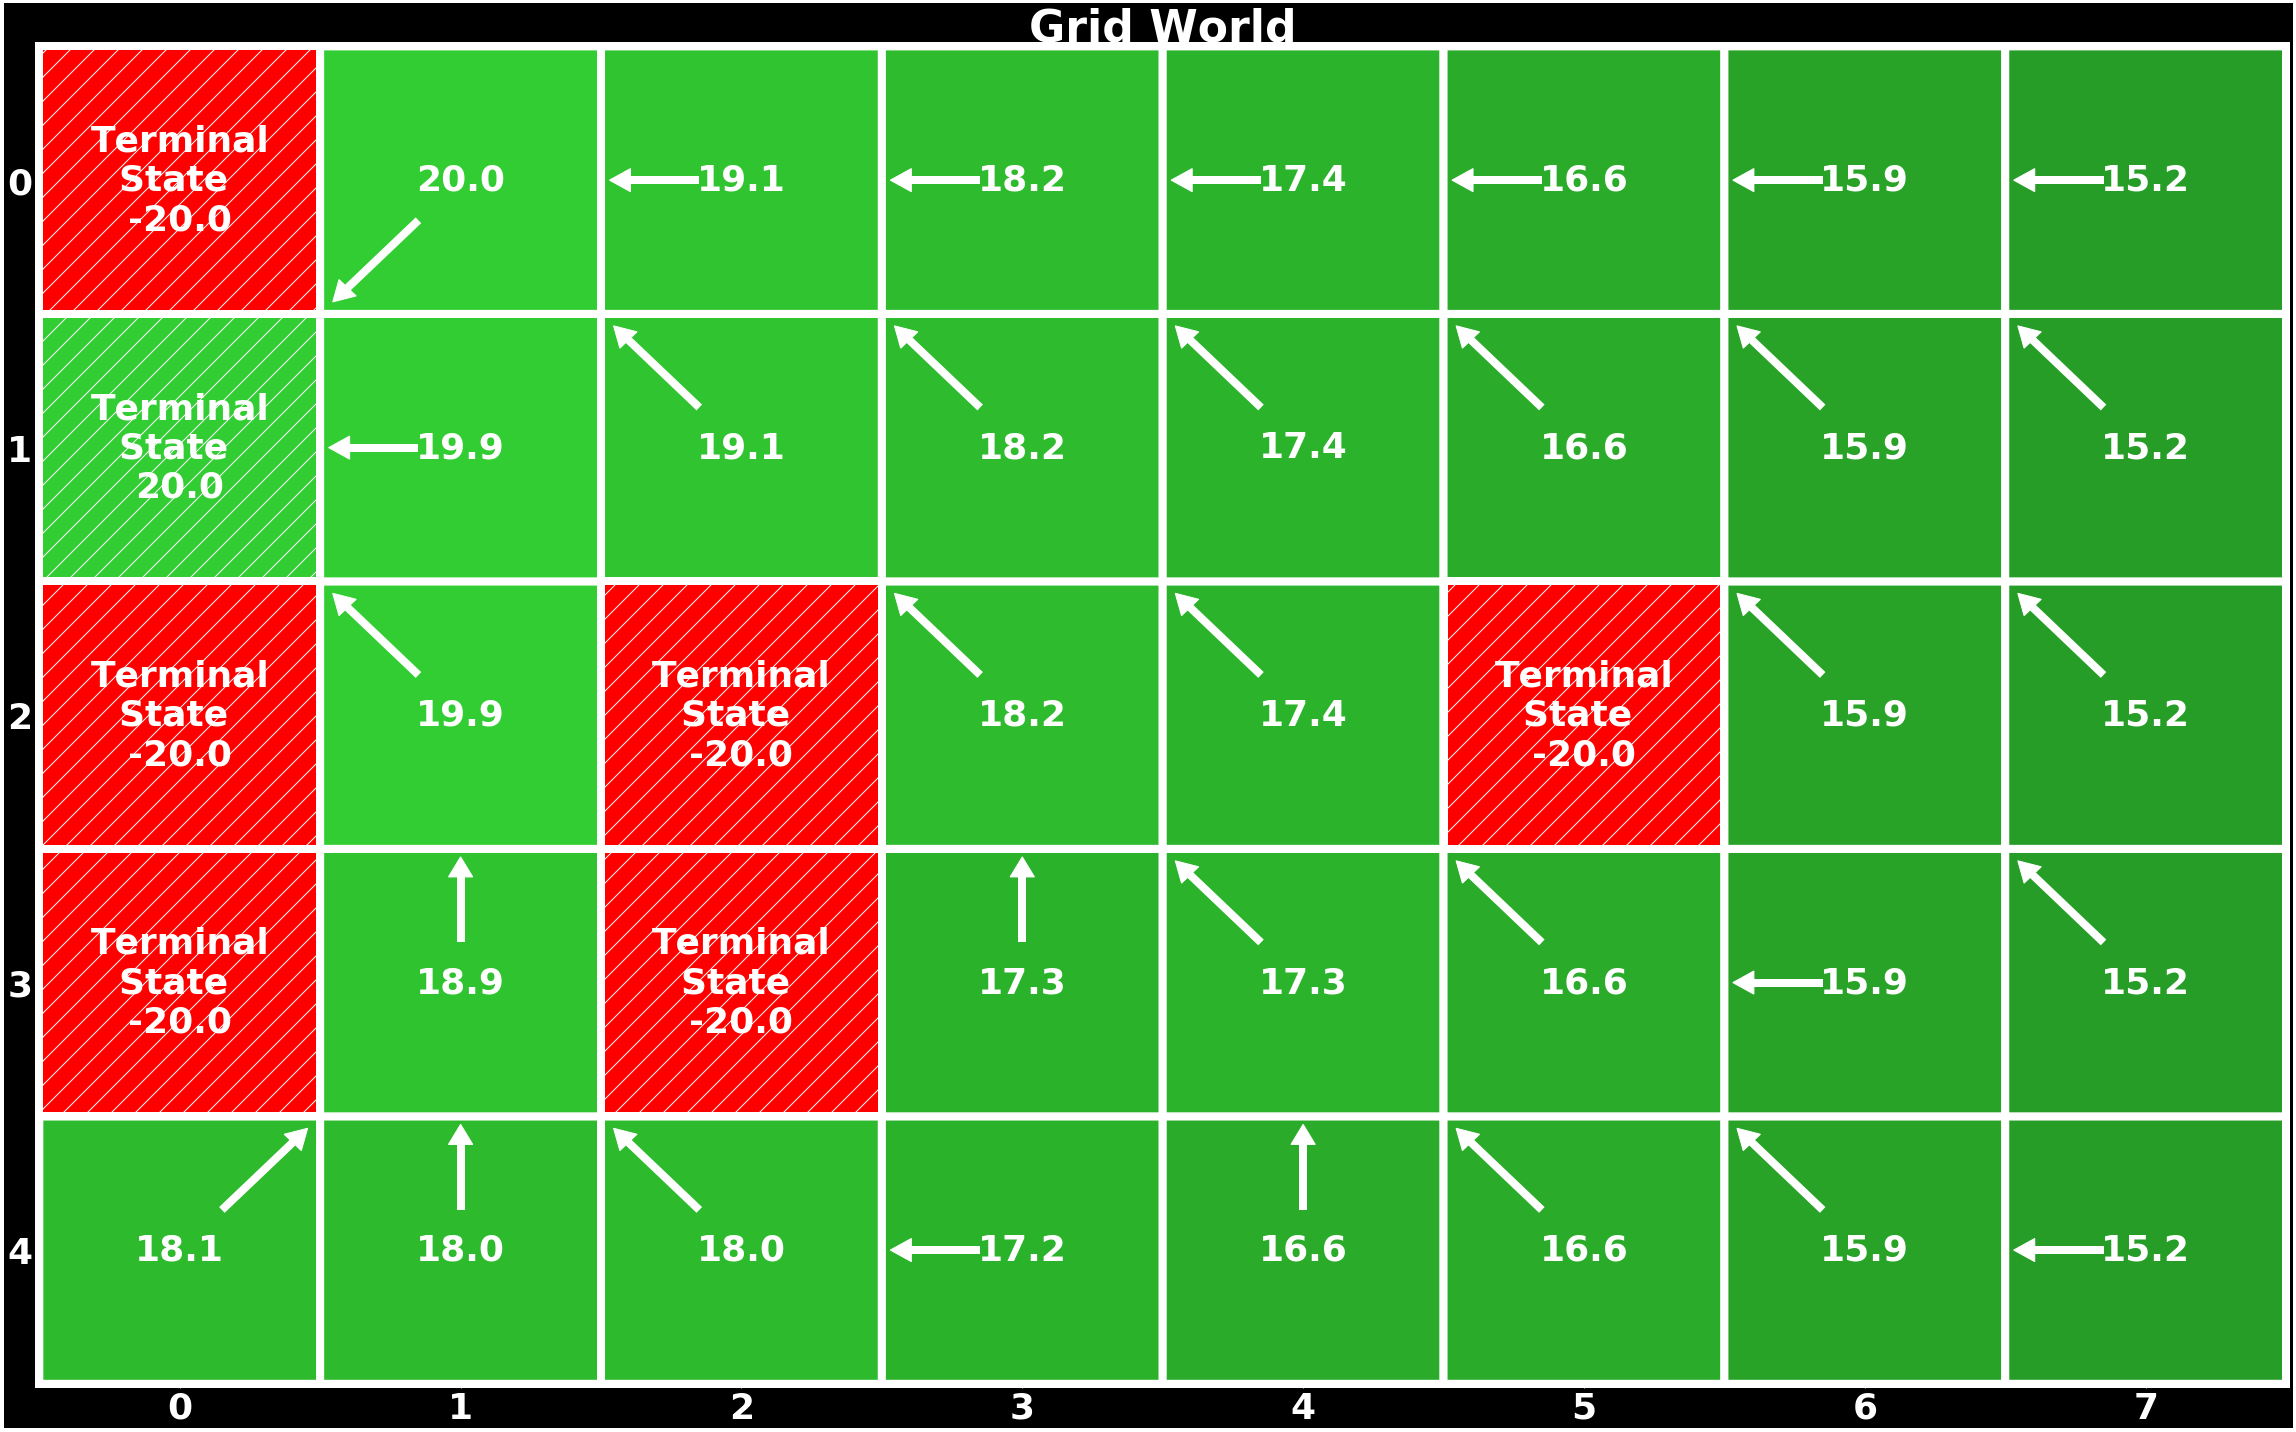

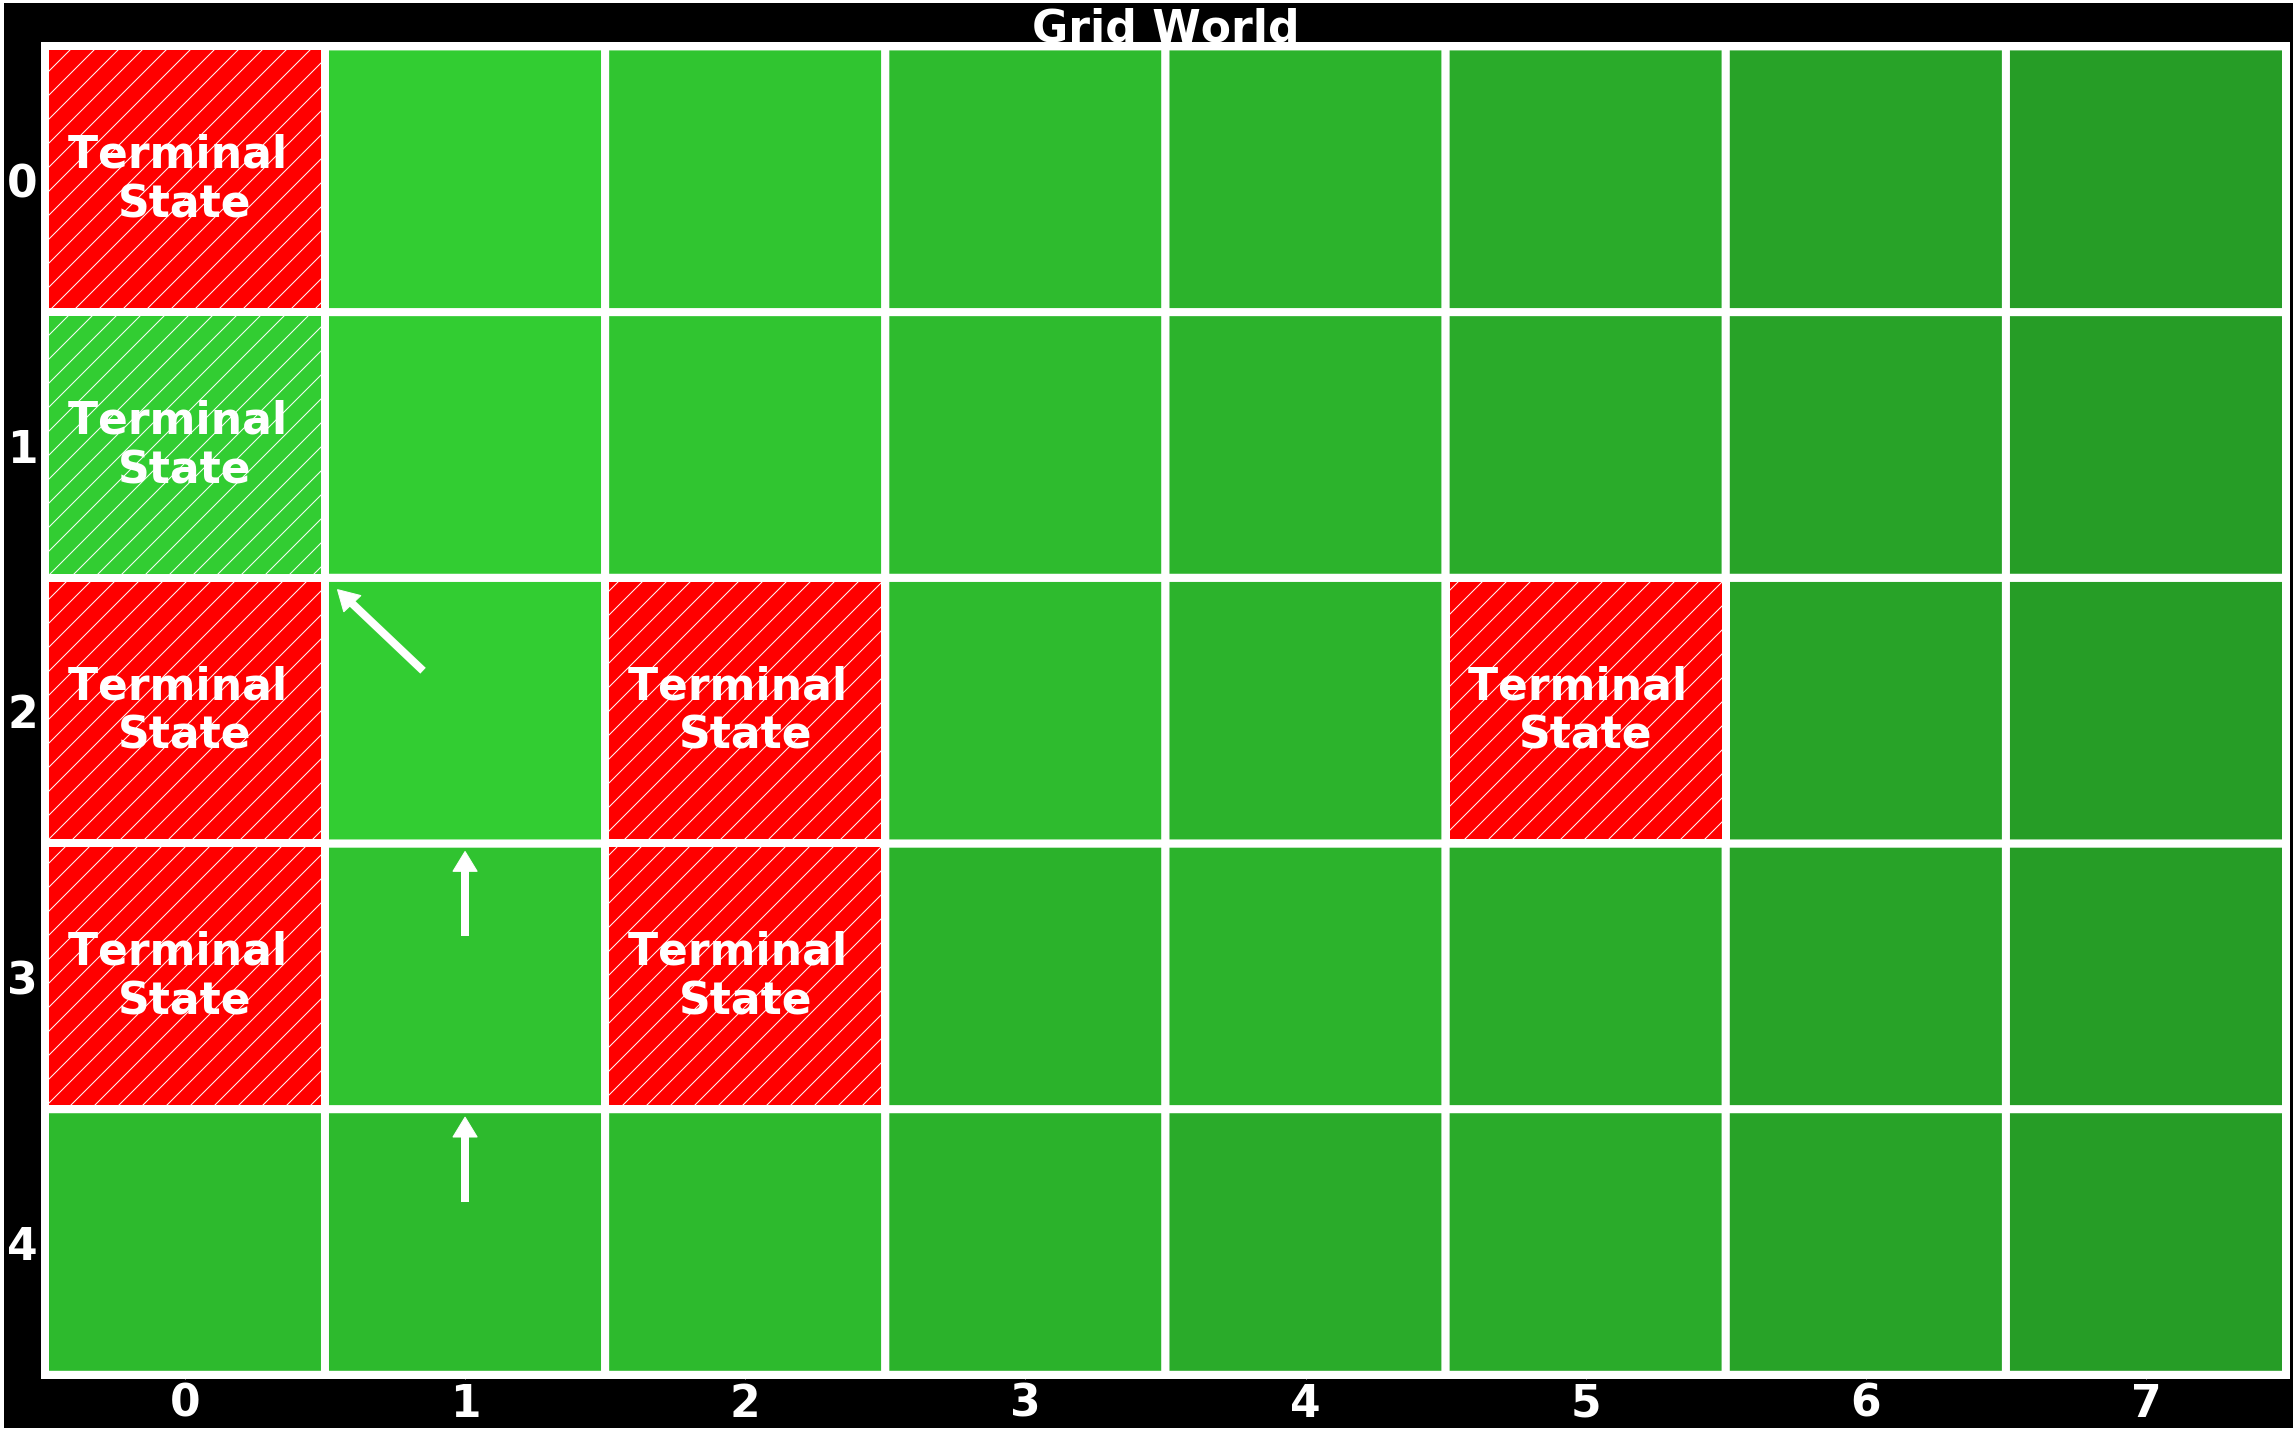

0.00539249664208 0.000832101806252


In [886]:
model_rl.risk_q_contraction(mdp, agent_neutral, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_neutral.png', save_fig=True)
display.show_values(fig_name='value_neutral.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_neutral.png', save_fig=True)

error_neutral = model_rl.test_optimal_risk_q(mdp, agent_neutral)
print error_neutral.max(), error_neutral.mean()

# Low Risk Averse Agent

0 not converged 320 0.0
1000 not converged 320 0.00753512576003
2000 not converged 320 0.00510644921408
3000 not converged 320 0.00336798576131
4000 not converged 317 0.00201146151249
5000 not converged 317 0.000996743591607
6000 not converged 316 0.0010376506379
7000 not converged 311 0.000982341582654
8000 not converged 215 0.000982315502343
9000 not converged 115 0.000982315502343


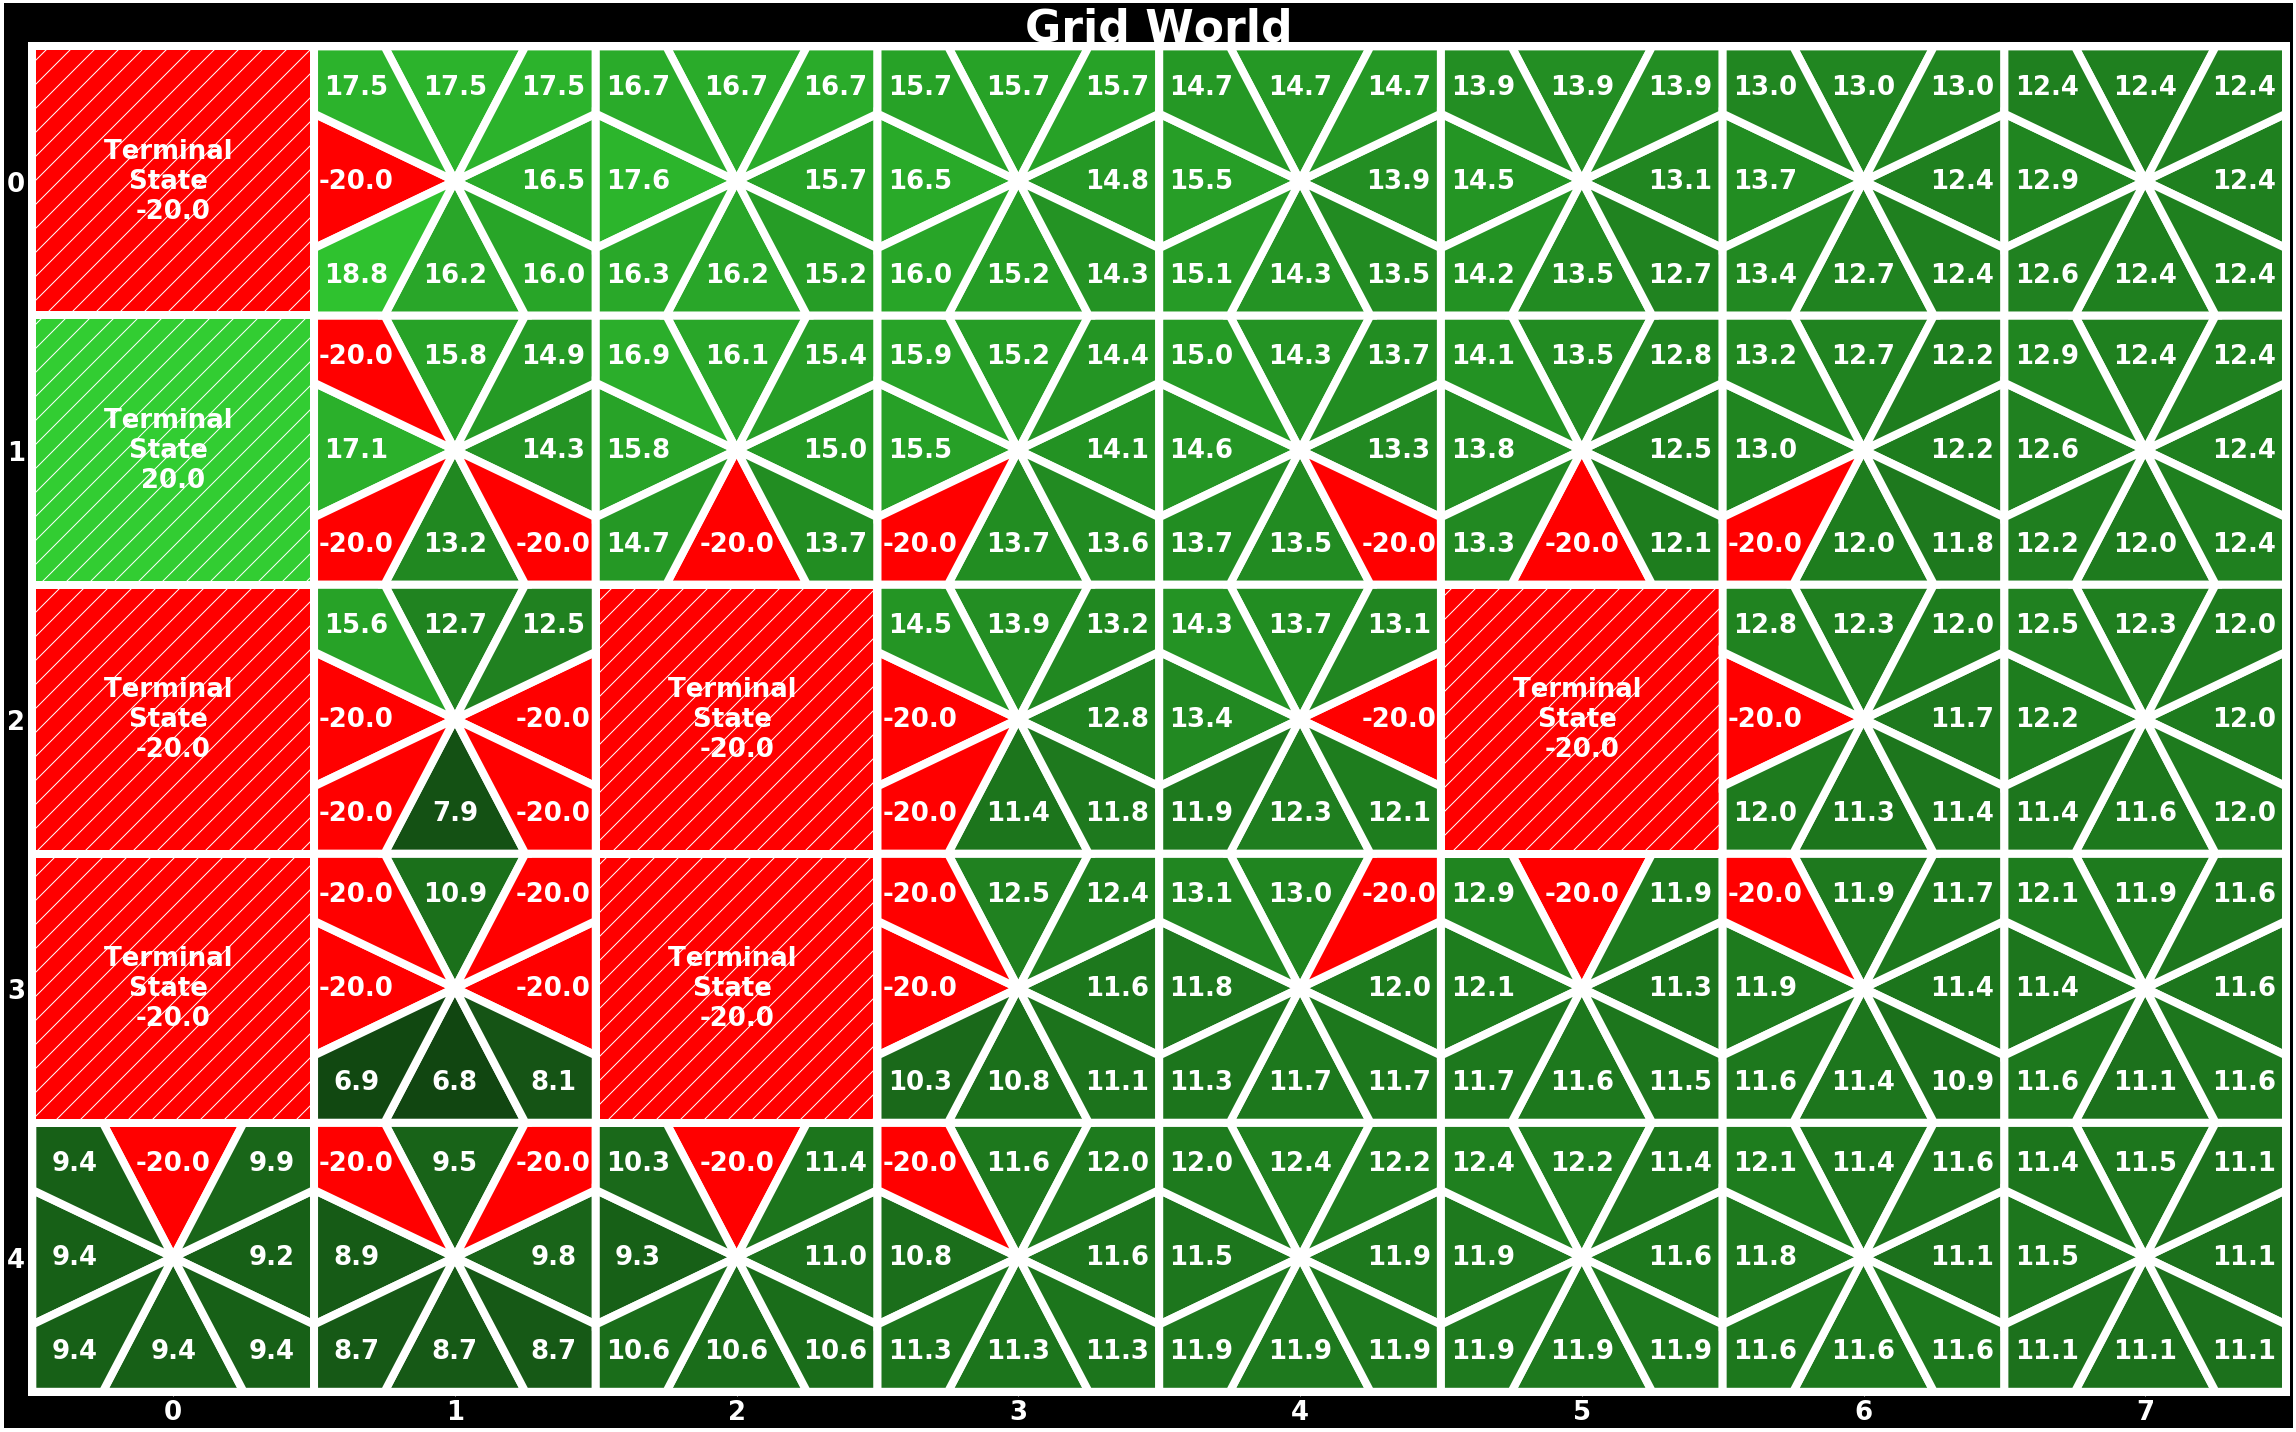

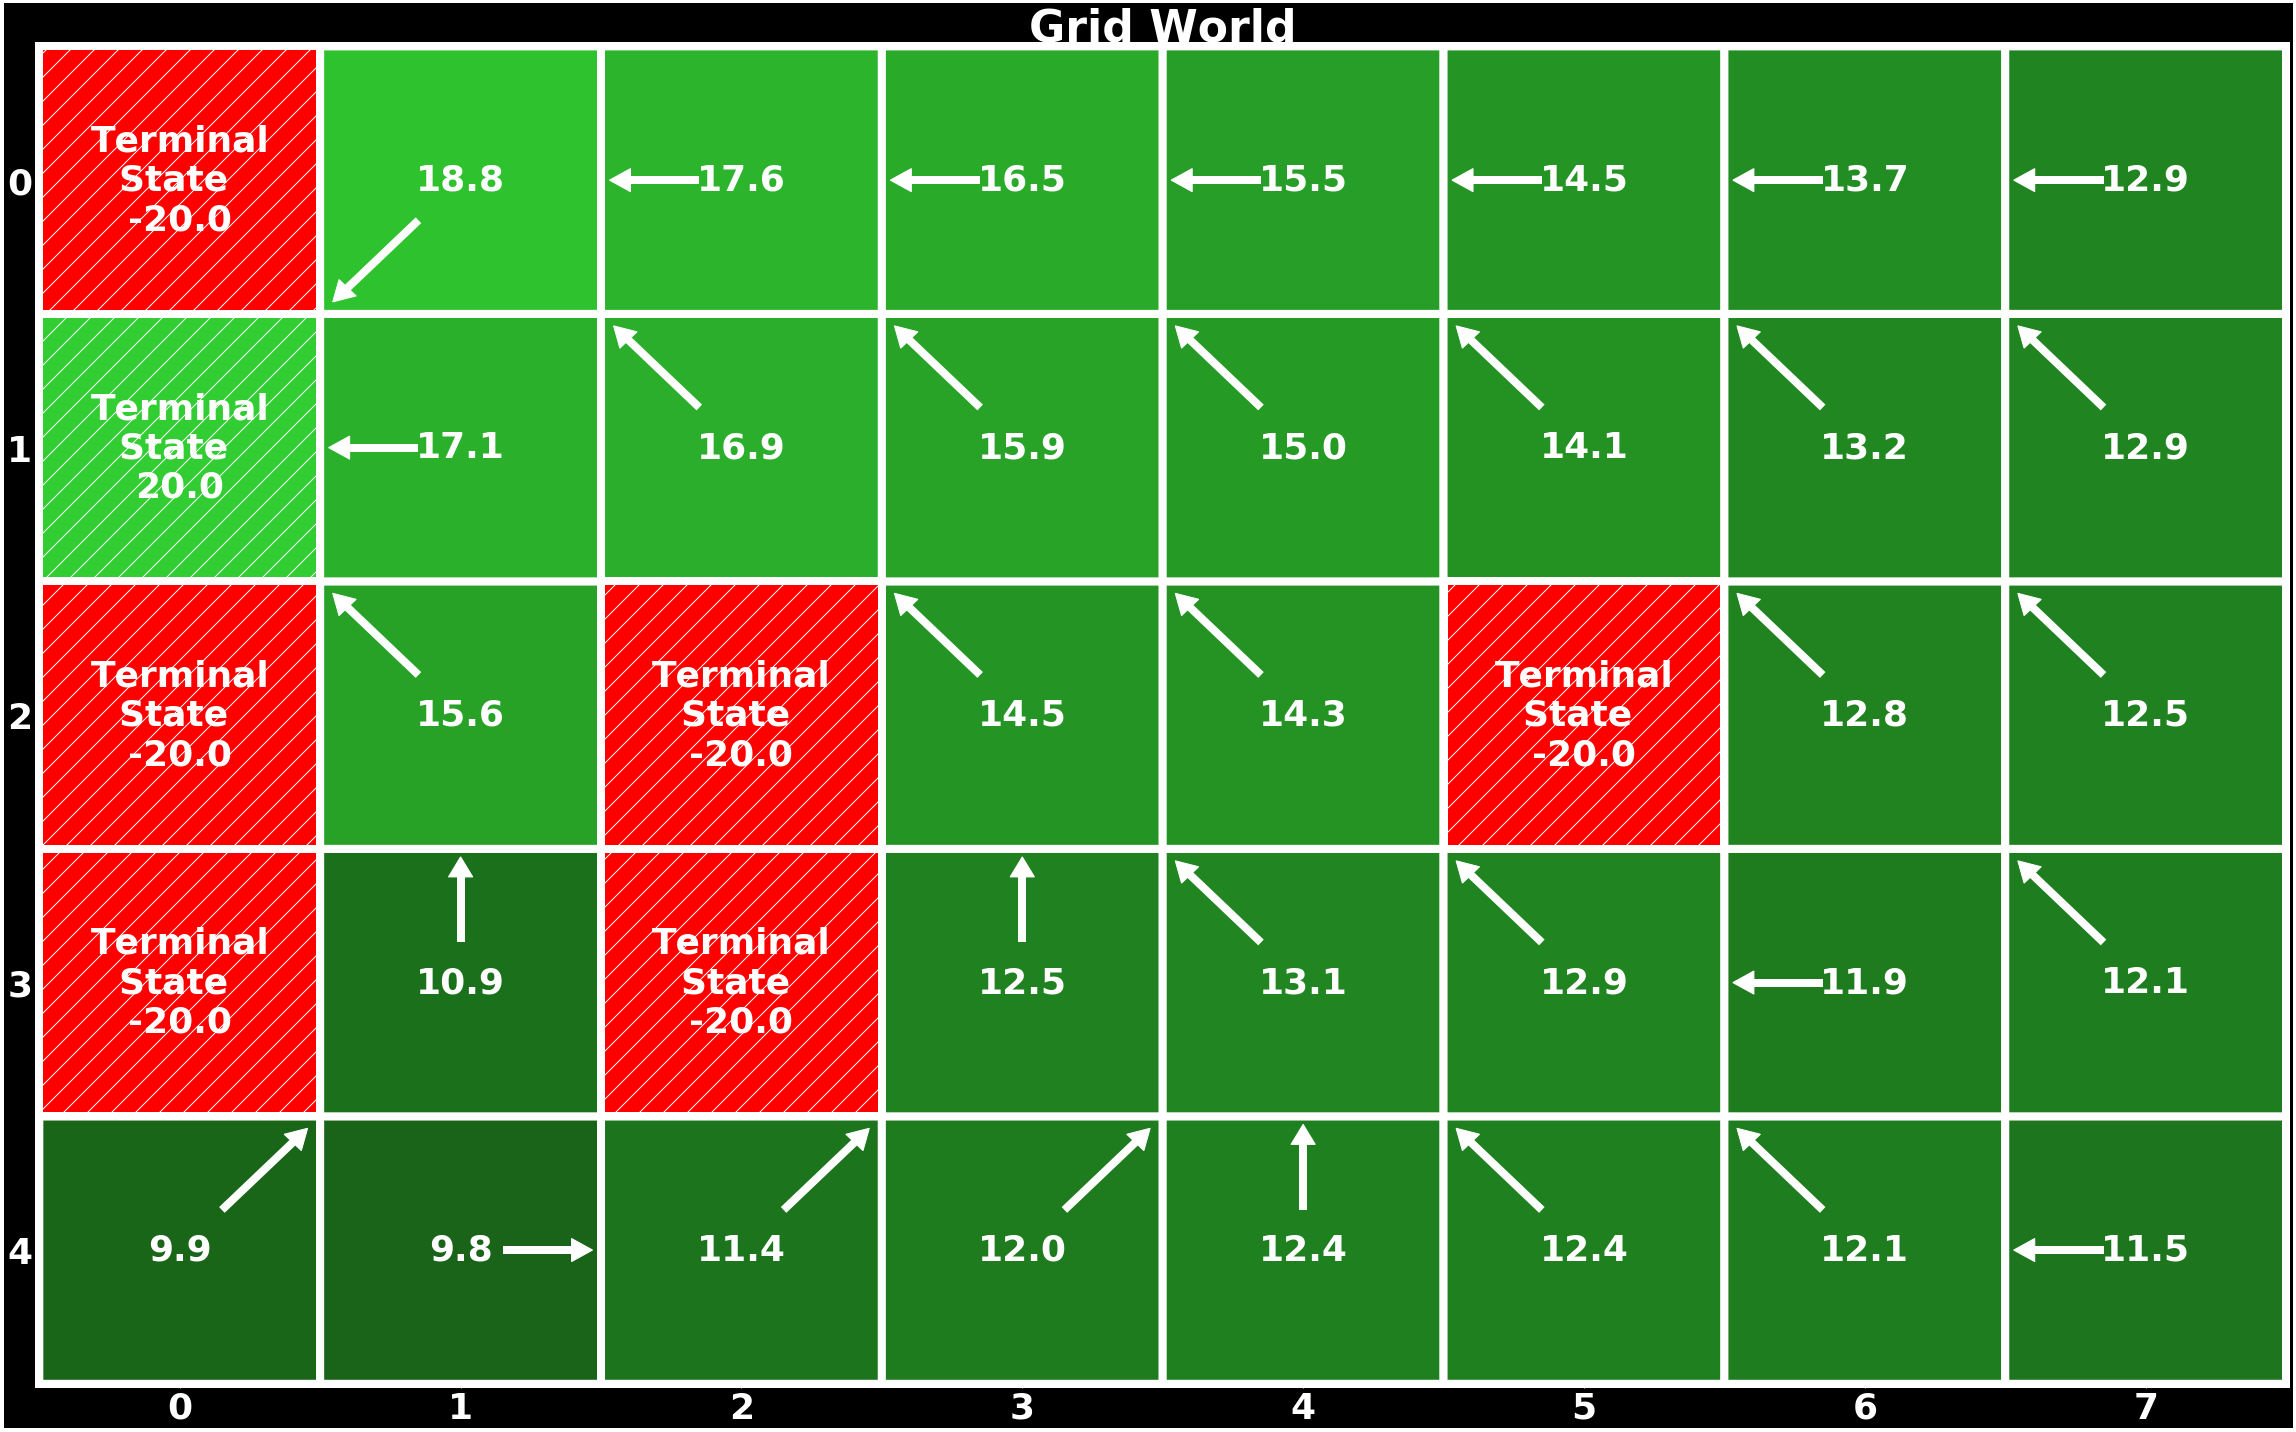

0.0982315502343 0.00812586966771


In [939]:
model_rl.risk_q_contraction(mdp, agent_low, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_low.png', save_fig=True)
display.show_values(fig_name='value_low.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_low.png', save_fig=True)

error_low = model_rl.test_optimal_risk_q(mdp, agent_low)
print error_low.max(), error_low.mean()

# Mid Risk Averse Agent

0 not converged 320 0.0
1000 not converged 320 0.00753512576003
2000 not converged 318 0.00571525930331
3000 not converged 317 0.00533553285232
4000 not converged 317 0.00541292522476
5000 not converged 317 0.00538655324171
6000 not converged 317 0.00464086429903
7000 not converged 317 0.00550044432392
8000 not converged 317 0.00572178982698
9000 not converged 316 0.0059345459539


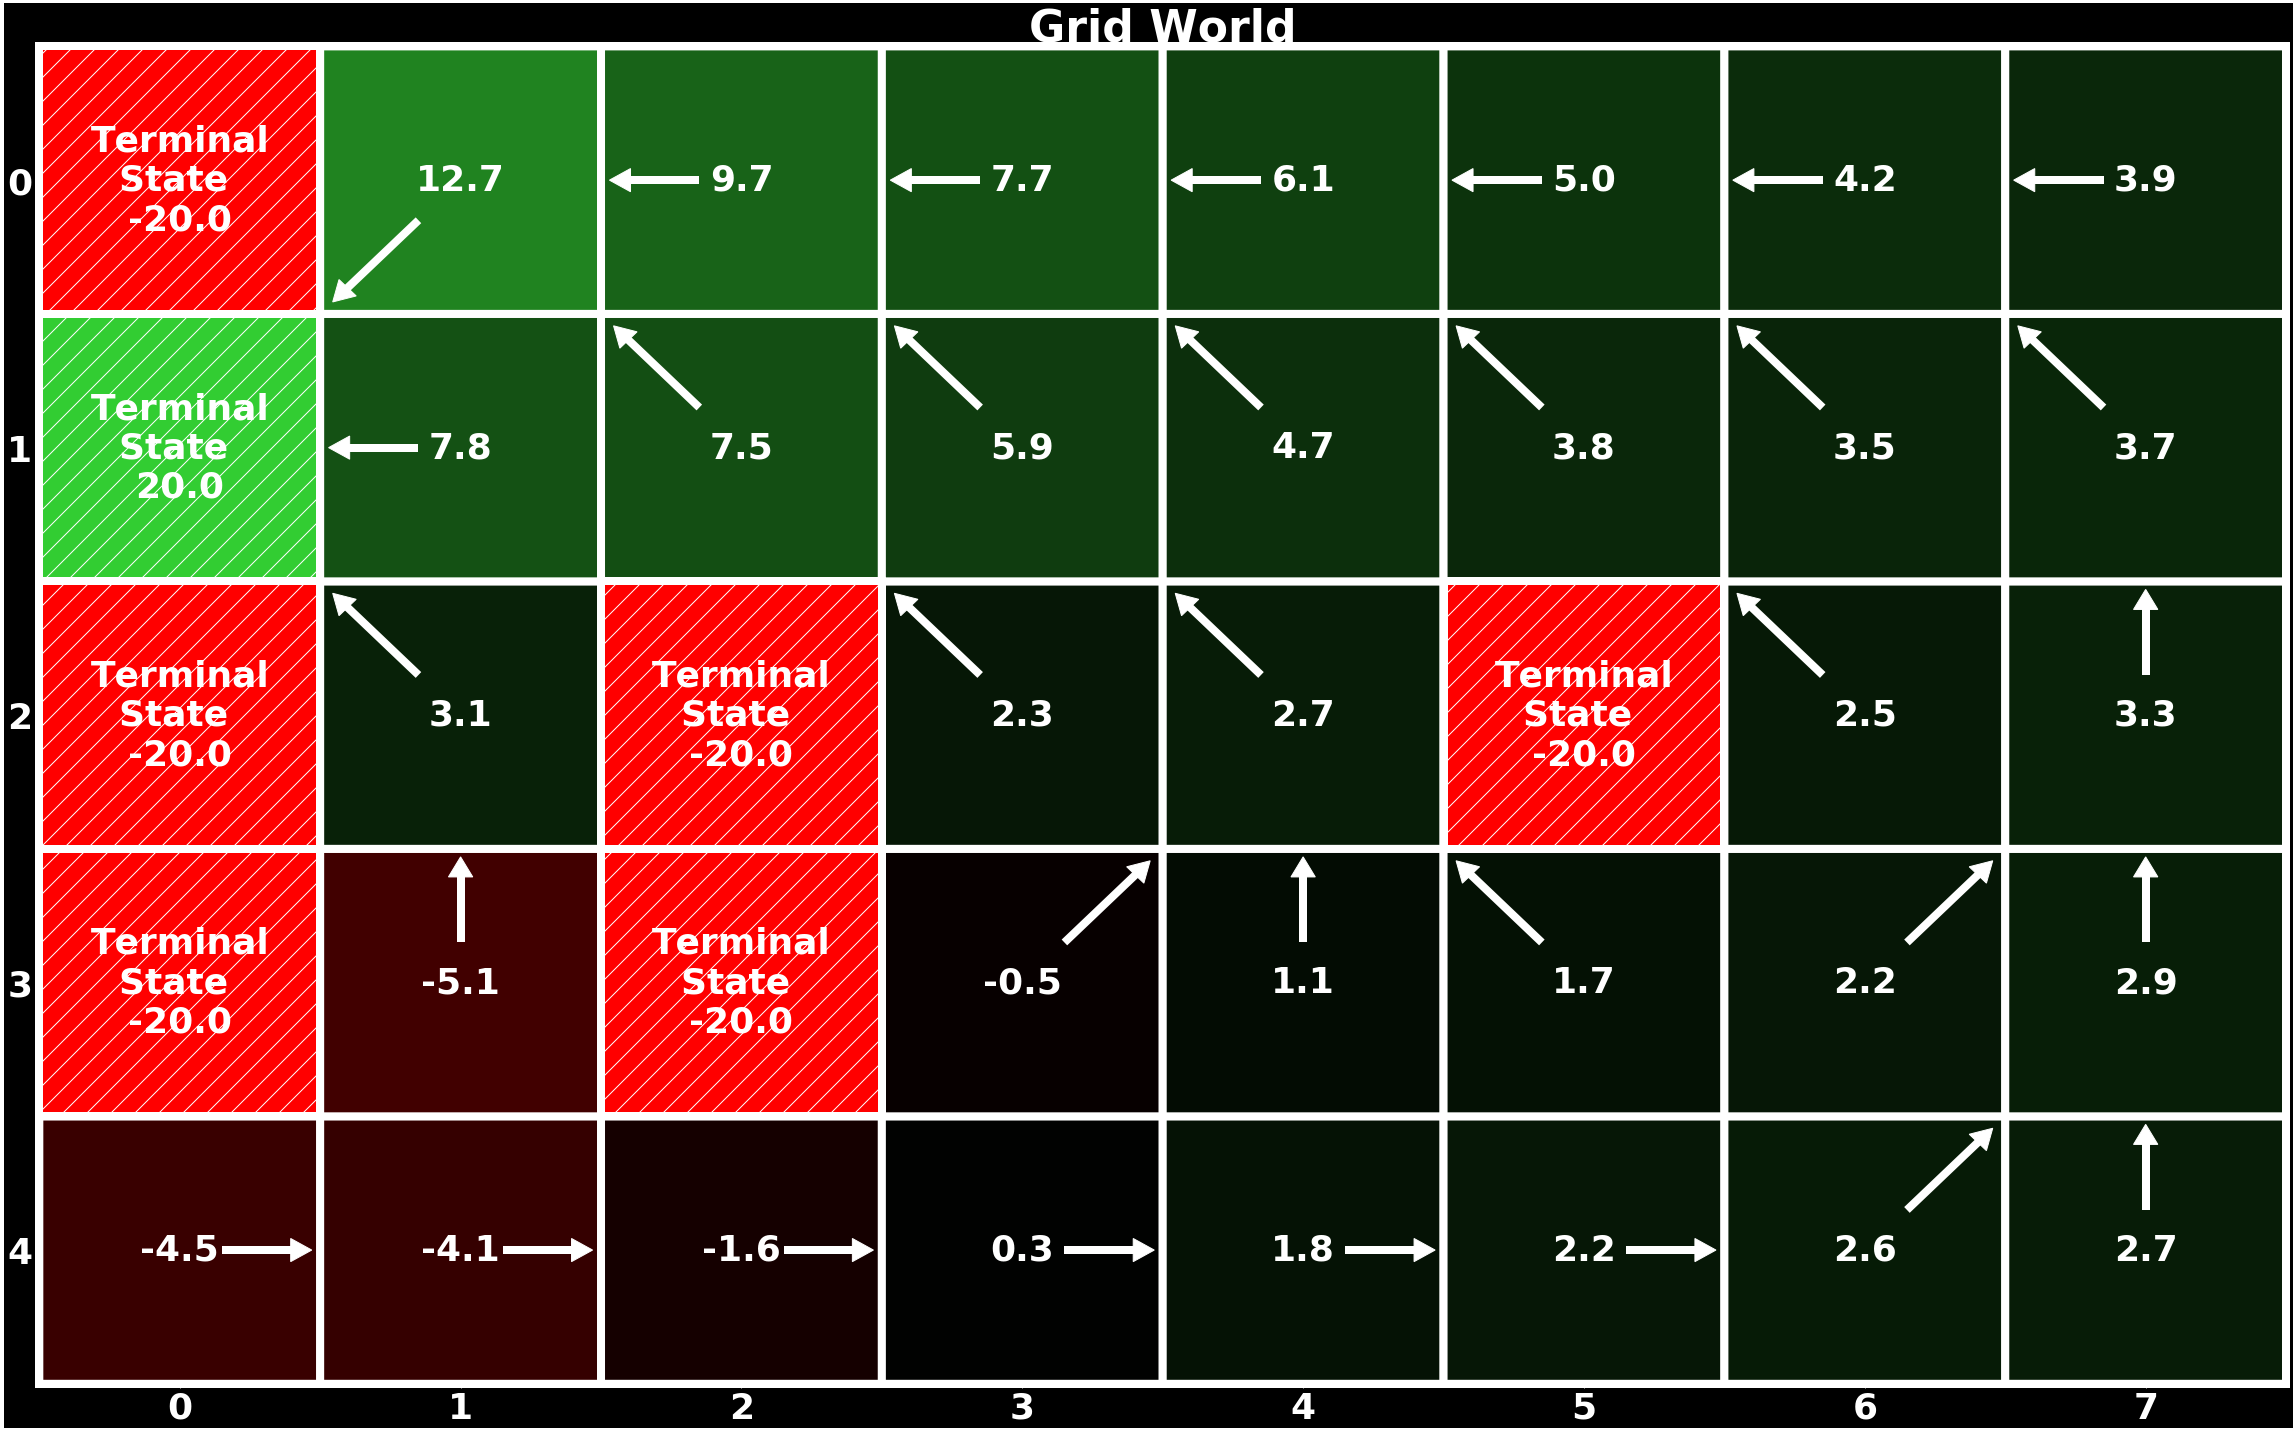

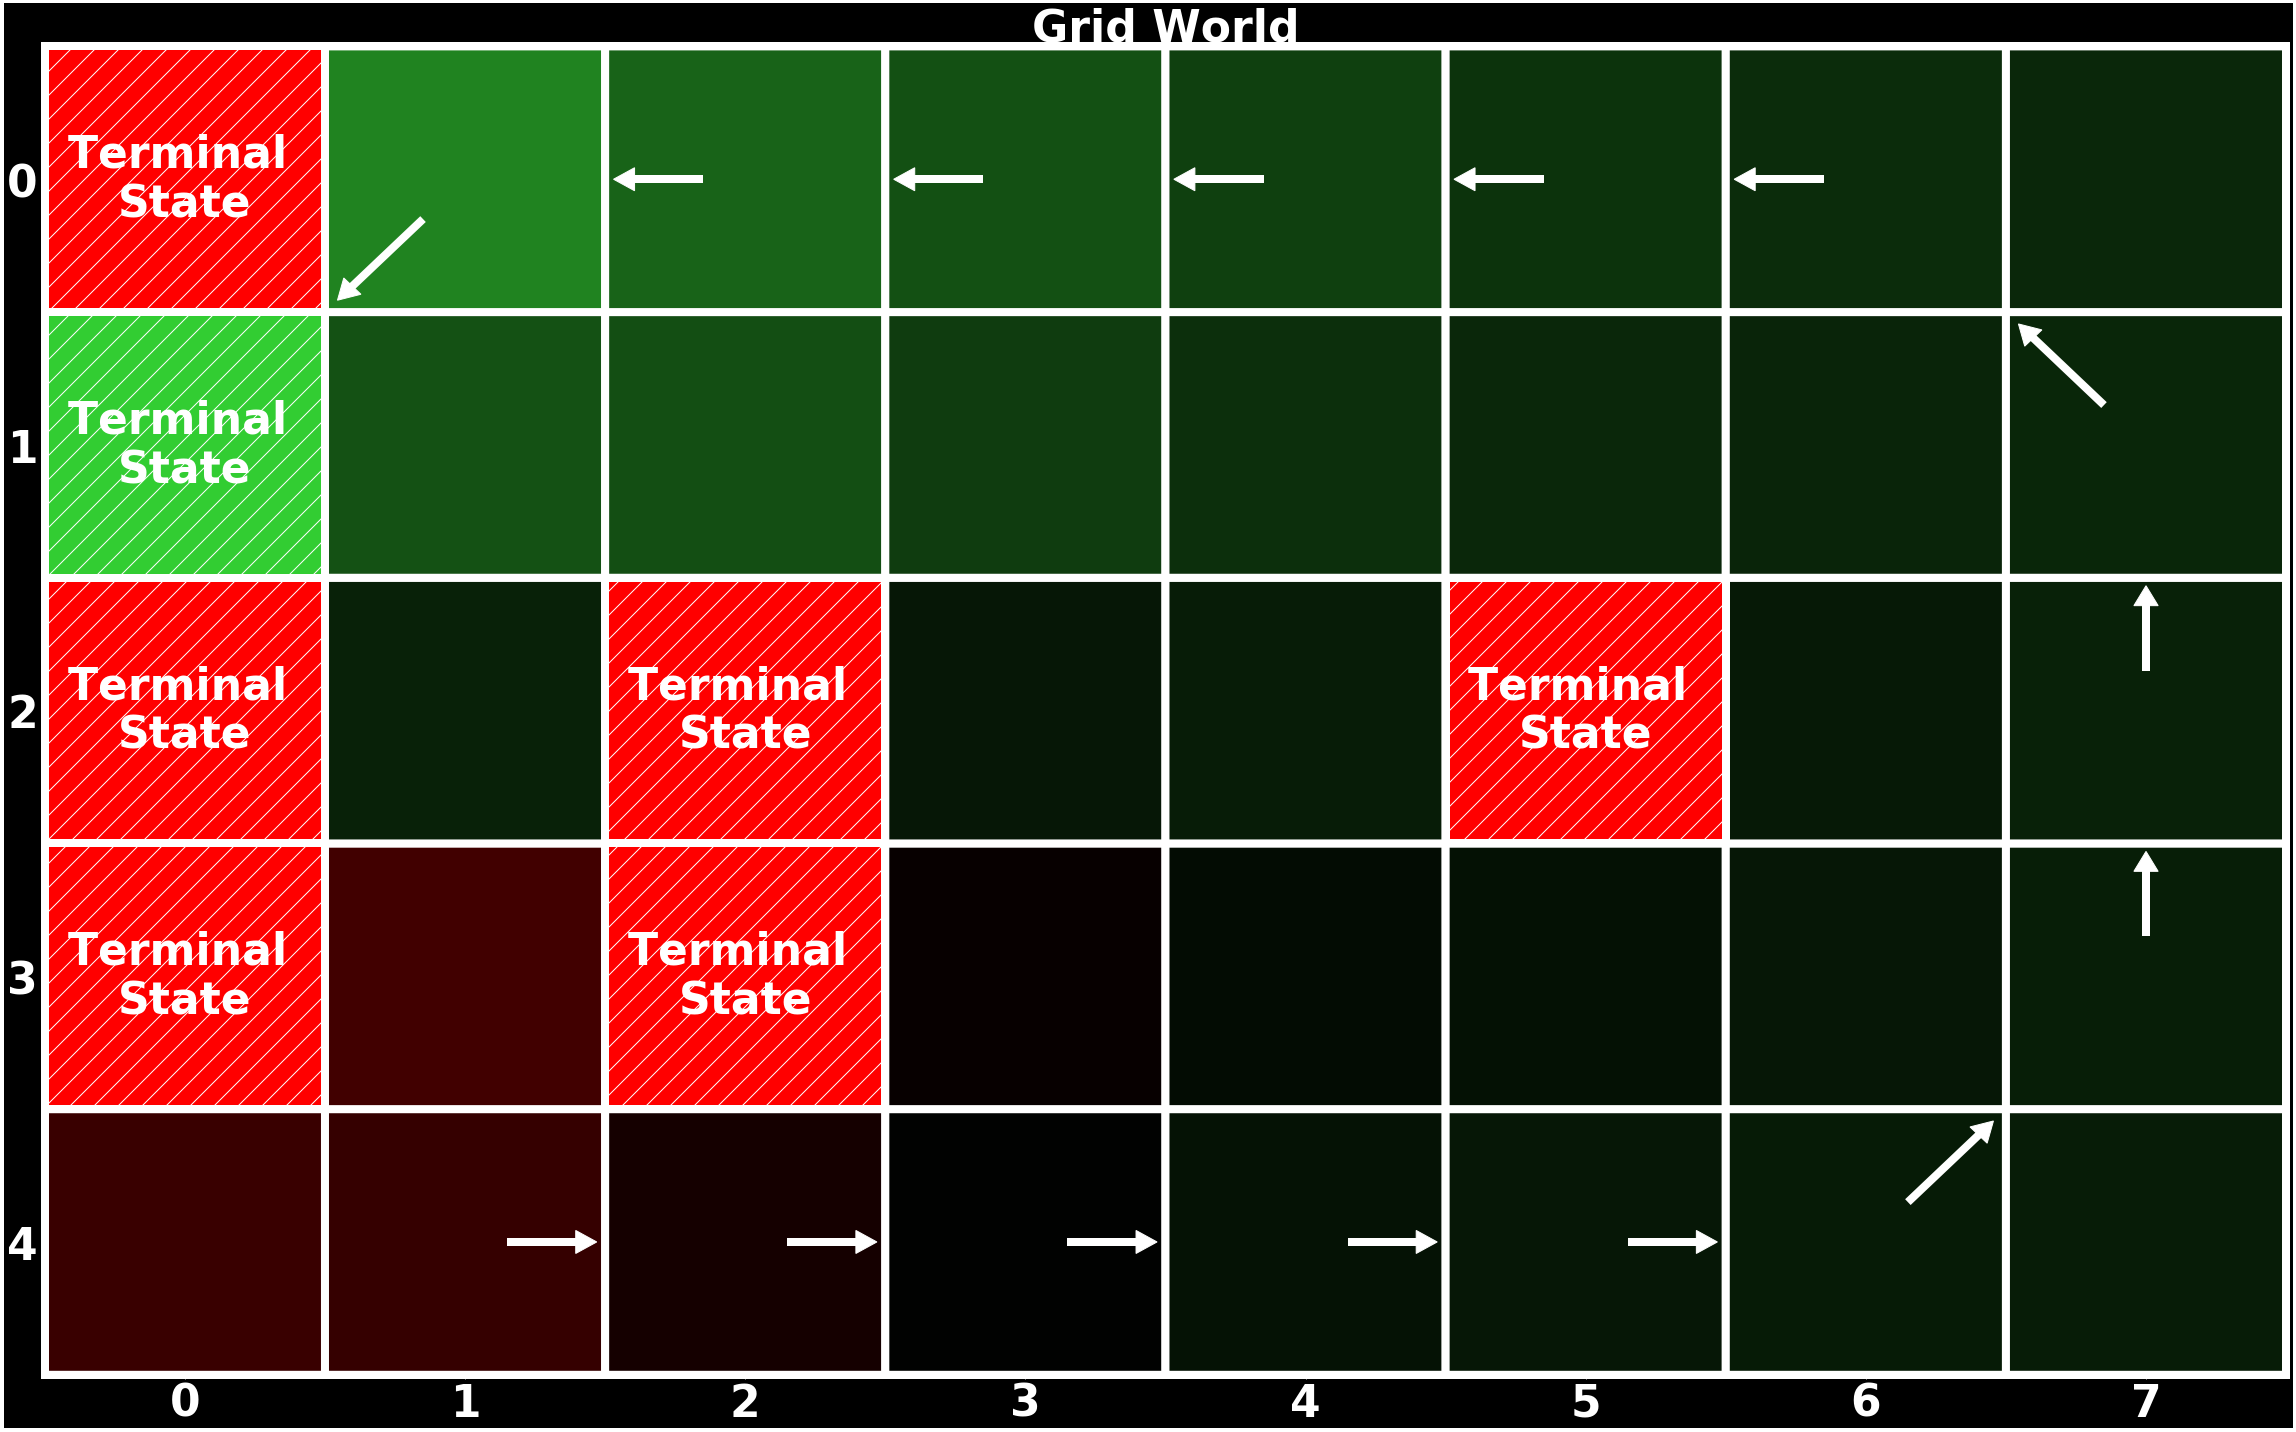

0.842724127233 0.0413447201887


In [953]:
model_rl.risk_q_contraction(mdp, agent_mid, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_mid.png', save_fig=True)
display.show_values(fig_name='value_mid.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_mid.png', save_fig=True)

error_mid = model_rl.test_optimal_risk_q(mdp, agent_mid)
print error_mid.max(), error_mid.mean()

# High Risk Averse Agent

0 not converged 320 0.0
1000 not converged 318 0.00753512576003
2000 not converged 312 0.00685123598859
3000 not converged 309 0.00611959234978
4000 not converged 309 0.00667025768376
5000 not converged 309 0.007206612894
6000 not converged 309 0.00612527412818
7000 not converged 309 0.00721779843911
8000 not converged 309 0.00738732510477
9000 not converged 300 0.00708520216471


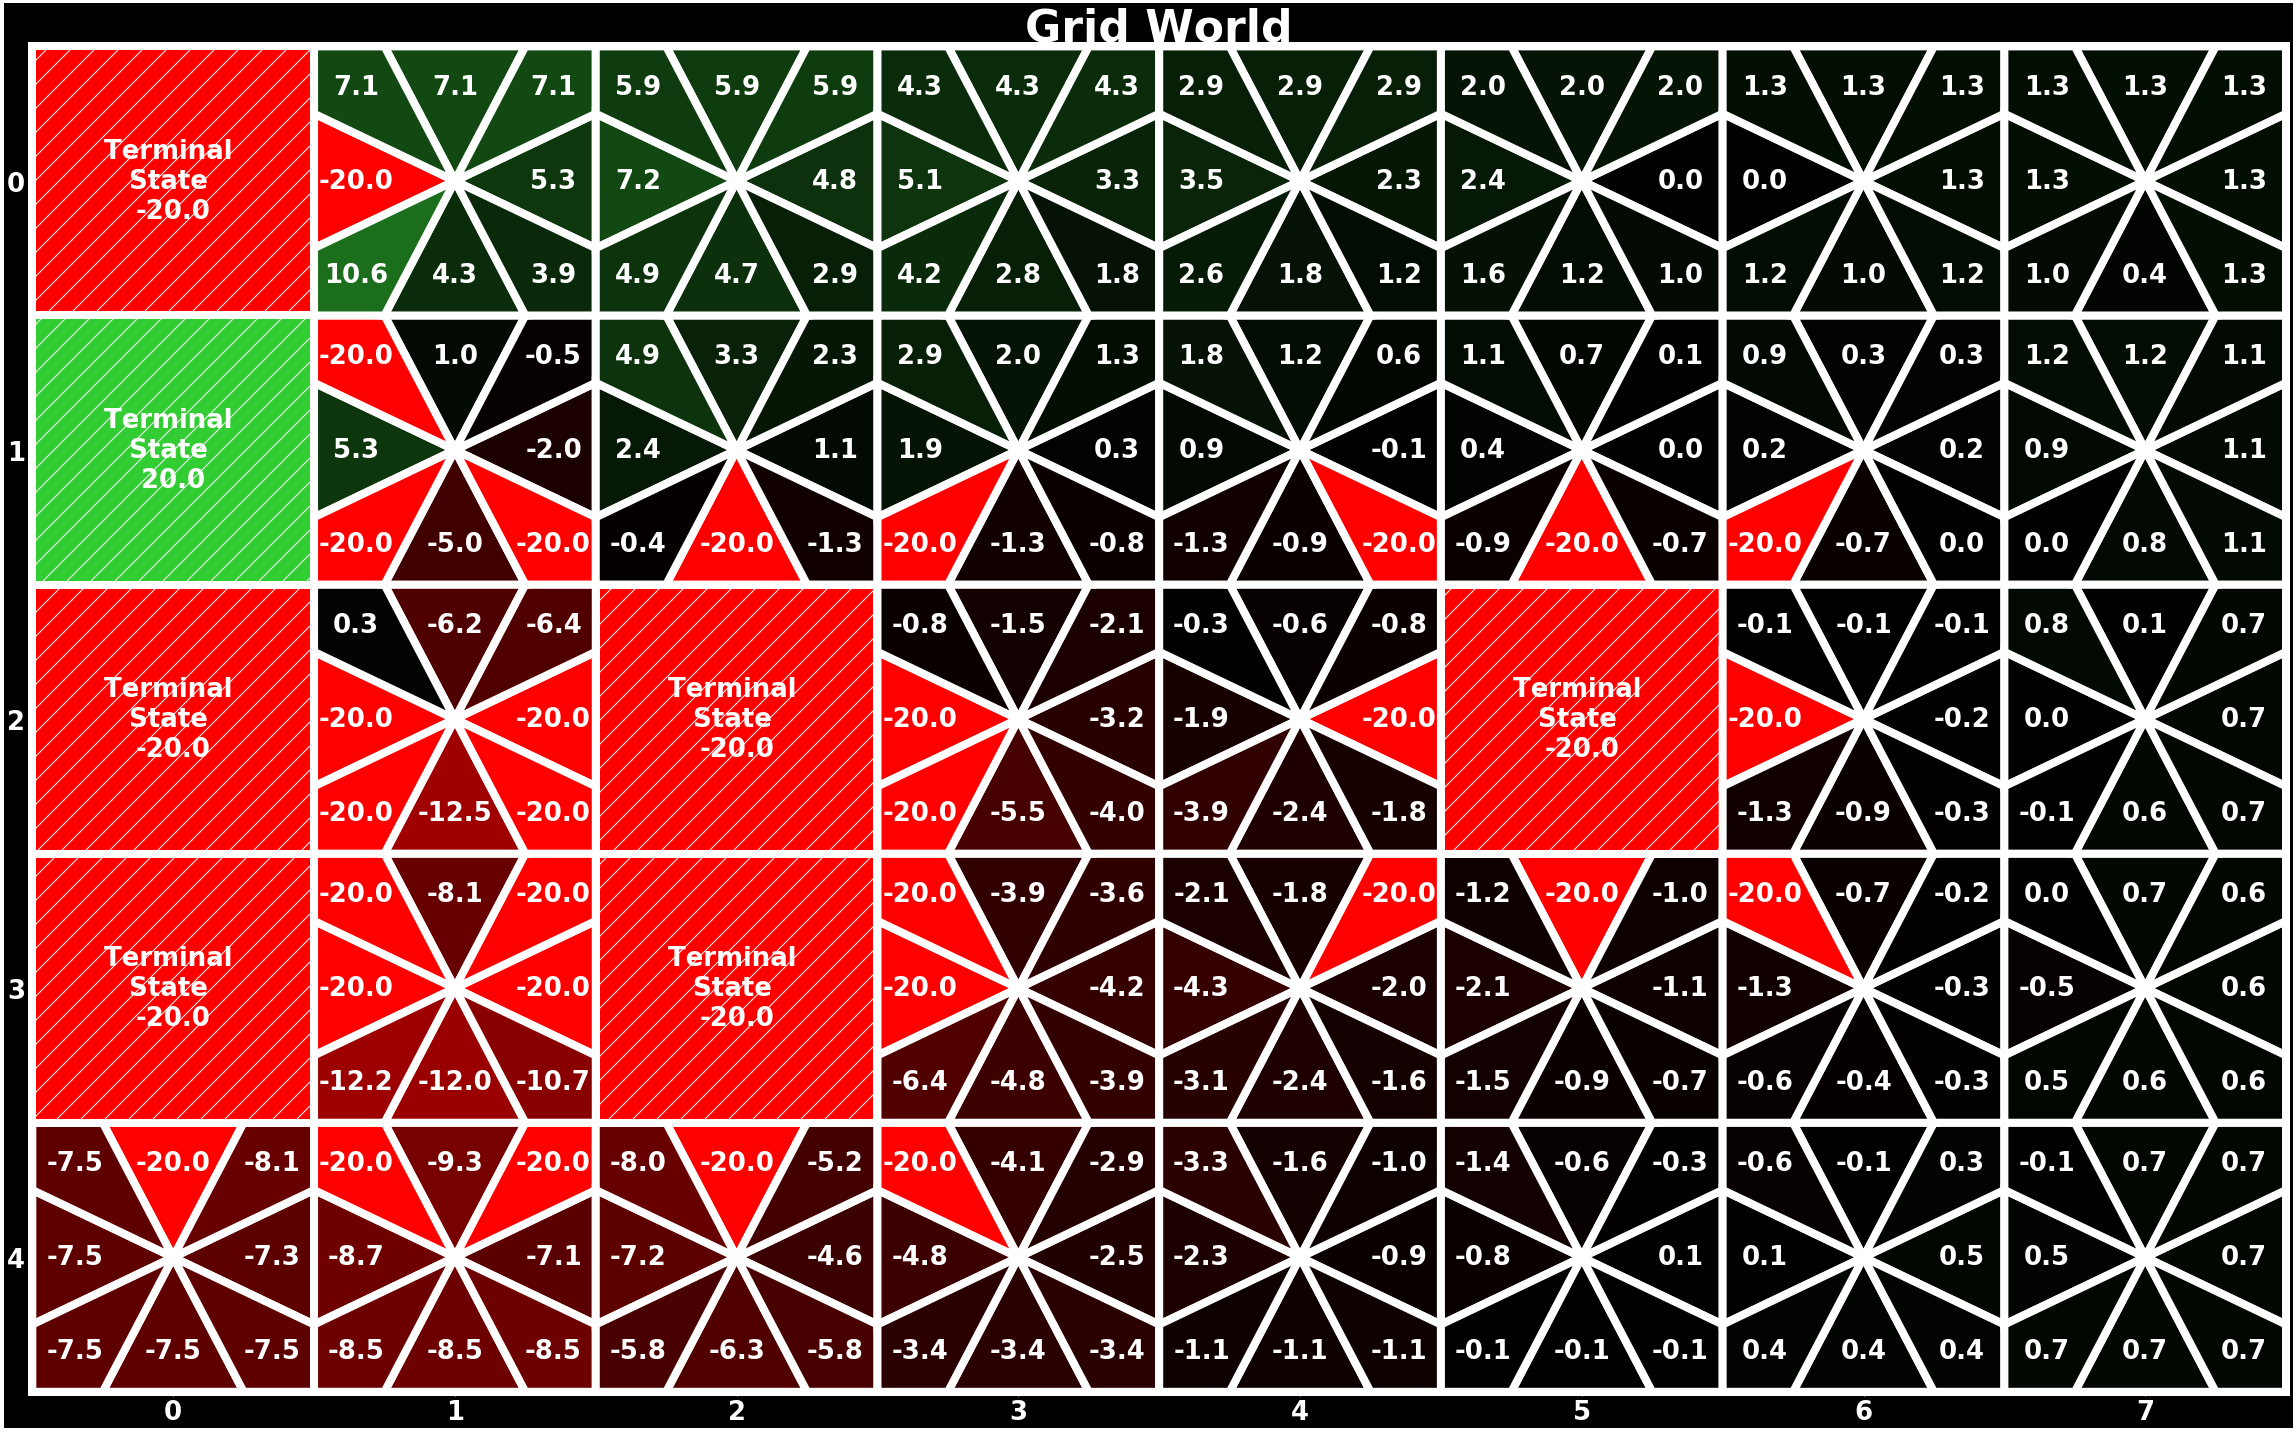

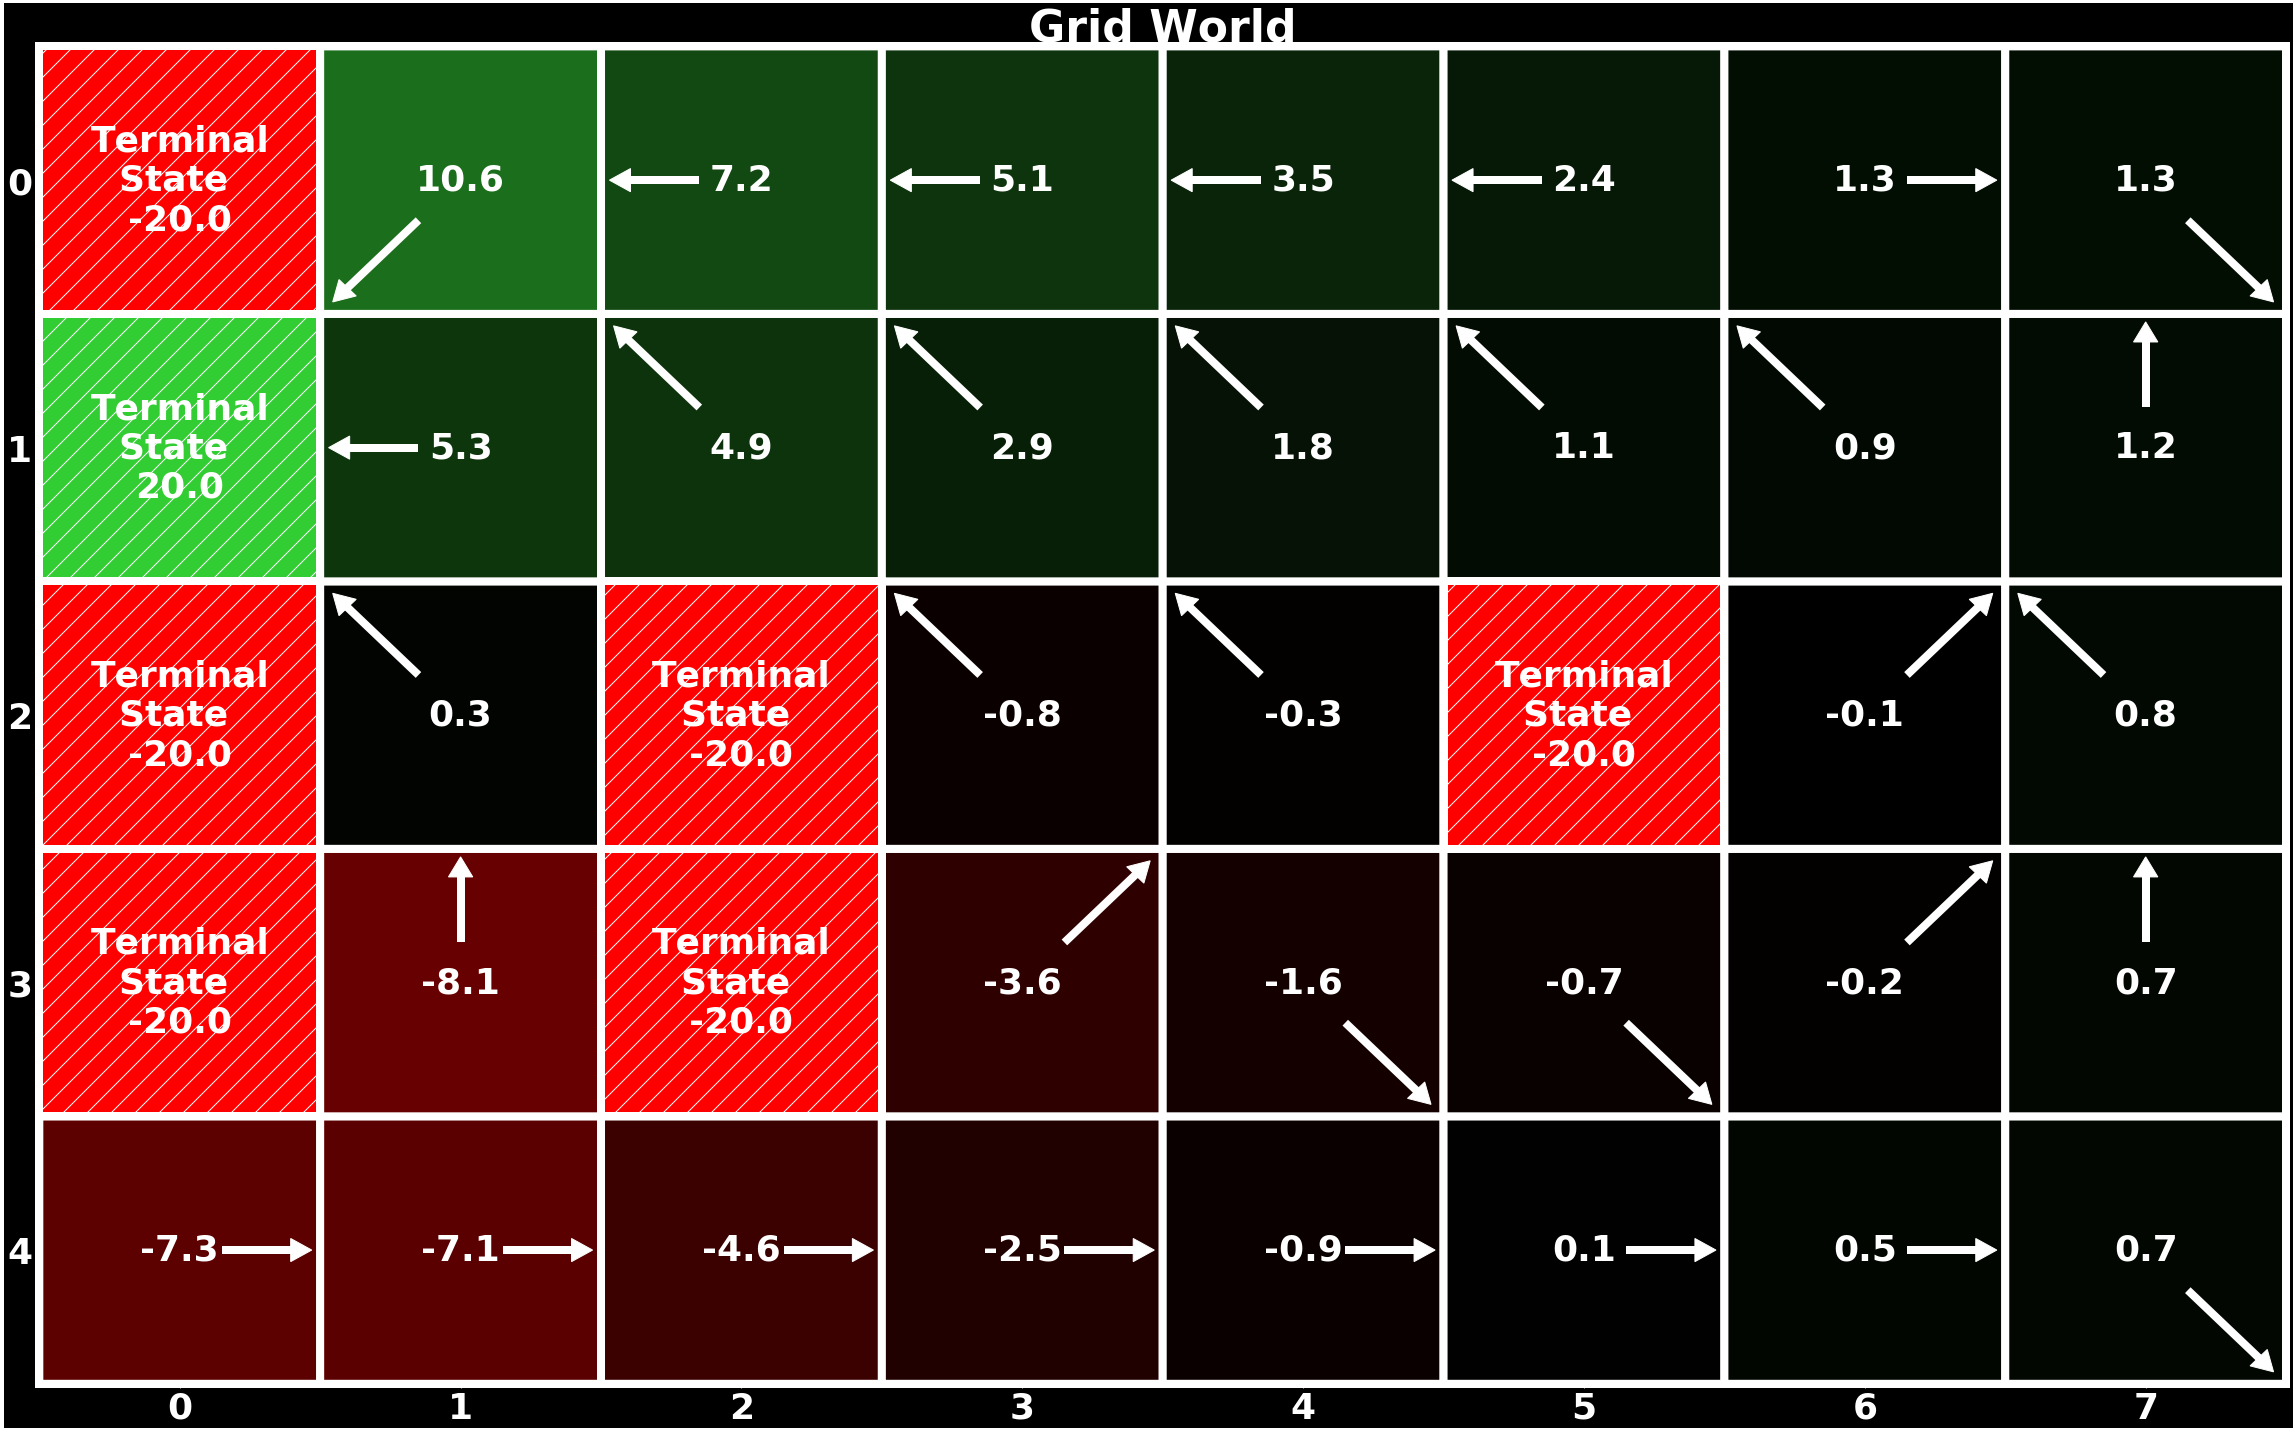

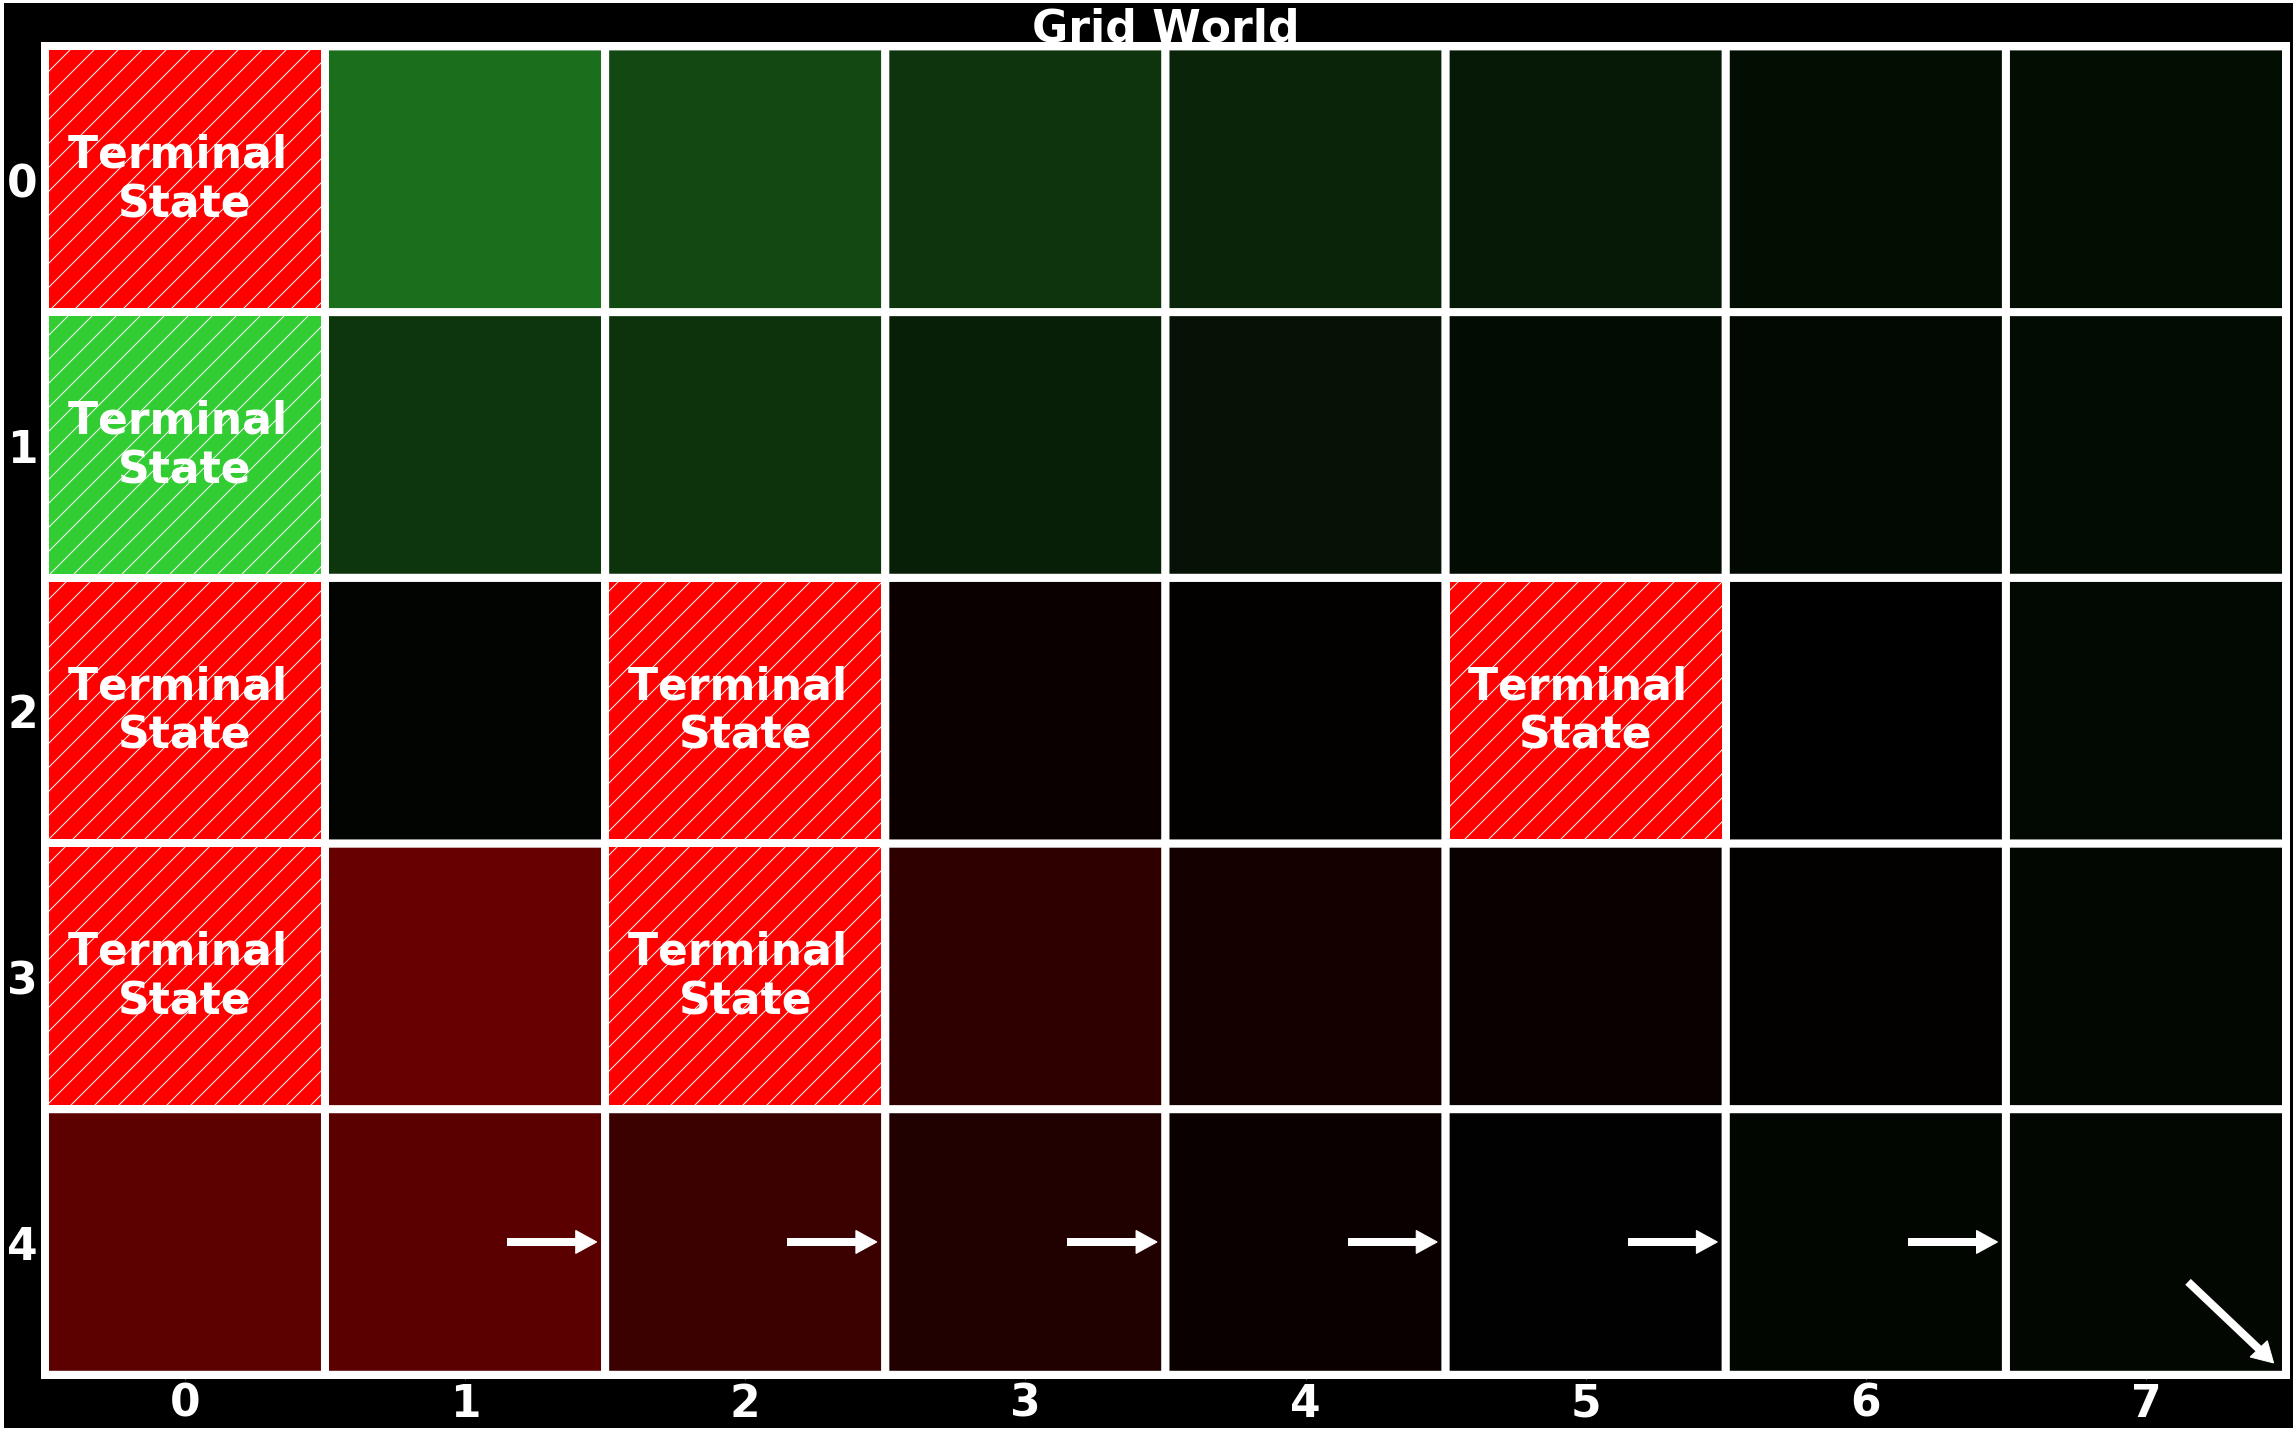

1.52020183064 0.0815219050832


In [941]:
model_rl.risk_q_contraction(mdp, agent_high, alpha=alpha, tol=tol, verbose=True)

display = RL.GridDisplay(model_rl, mdp)
display.show_q_values(fig_name='q_value_high.png', save_fig=True)
display.show_values(fig_name='value_high.png', save_fig=True)
show_states = mdp.get_policy_path(model_rl, start_state)
display.show_policy(show_states, fig_name='policy_high.png', save_fig=True)

error_high = model_rl.test_optimal_risk_q(mdp, agent_high)

print error_high.max(), error_high.mean()